In [1]:
from scipy.io import loadmat

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from scipy import stats
from scipy.io import loadmat
from sklearn.preprocessing import StandardScaler

# Stats
from scipy.stats import friedmanchisquare, wilcoxon

In [2]:
import importlib

In [3]:
# Figure settings from M Jantz

resolution = 300
sns.set_theme(style="ticks", context="notebook", font_scale=.9,
            rc={"figure.dpi":resolution, 'savefig.dpi': resolution*2,
                "axes.labelcolor": 'black', "text.color":'black',
                "xtick.labelcolor": 'black', "ytick.labelcolor":'black',
                'font.family':'Arial',
                "xtick.major.size": 3, "ytick.major.size": 3,
                "xtick.major.width": 1, "ytick.major.width": 1,
                "xtick.major.pad": 3.5, "ytick.major.pad": 3.5,
                "axes.linewidth": 1, "lines.linewidth": 1})
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [4]:
# Figure settings from W Hockeimer

import matplotlib as mpl
new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none',
"font.sans-serif": "Arial",
"font.family": "sans-serif"
}
mpl.rcParams.update(new_rc_params)

# SET YOUR SAVE PATH

In [5]:
SAVE_PATH = # SET

In [6]:
# Color maps

array_colors = {'Both': '#A137DF', 'Medial':'#5055EF', 'Lateral':'#E7172F'}

In [7]:
def SF_NK(title):
    plt.savefig(SAVE_PATH + title + ".svg", transparent=True, bbox_inches="tight", dpi=resolution*2*2)

In [8]:
def changes_and_stats(df):

    # Separate into participants
    P2_vals = df.loc[df["Participant"] == "P2"].drop("Participant", axis=1)
    P3_vals = df.loc[df["Participant"] == "P3"].drop("Participant", axis=1)
    P4_vals = df.loc[df["Participant"] == "P4"].drop("Participant", axis=1)


    # Calculate median values
    P2_med = P2_vals.groupby('Array').median().transpose()
    P3_med = P3_vals.groupby('Array').median().transpose()
    P4_med = P4_vals.groupby('Array').median().transpose()

    print("Median percent change in decoding accuracies:")
    print(f"P2: Medial: {(100*(P2_med['Medial'] - P2_med['Both'])/P2_med['Both']).iloc[0]:.2f}%, Lateral: {(100*(P2_med['Lateral'] - P2_med['Both'])/P2_med['Both']).iloc[0]:.2f}%")
    print(f"P3: Medial: {(100*(P3_med['Medial'] - P3_med['Both'])/P3_med['Both']).iloc[0]:.2f}%, Lateral: {(100*(P3_med['Lateral'] - P3_med['Both'])/P3_med['Both']).iloc[0]:.2f}%")
    print(f"P4: Medial: {(100*(P4_med['Medial'] - P4_med['Both'])/P4_med['Both']).iloc[0]:.2f}%, Lateral: {(100*(P4_med['Lateral'] - P4_med['Both'])/P4_med['Both']).iloc[0]:.2f}%")

    print()

    # Run statistical tests

    # Friedman test
    print("Friedman test: ")
    print("P2: ", friedmanchisquare(P2_vals.loc[P2_vals["Array"] == "Both", "Accuracy"].to_numpy(), P2_vals.loc[P2_vals["Array"] == "Medial", "Accuracy"].to_numpy(), P2_vals.loc[P2_vals["Array"] == "Lateral", "Accuracy"].to_numpy()))
    print("P3: ", friedmanchisquare(P3_vals.loc[P3_vals["Array"] == "Both", "Accuracy"].to_numpy(), P3_vals.loc[P3_vals["Array"] == "Medial", "Accuracy"].to_numpy(), P3_vals.loc[P3_vals["Array"] == "Lateral", "Accuracy"].to_numpy()))
    print("P4: ", friedmanchisquare(P4_vals.loc[P4_vals["Array"] == "Both", "Accuracy"].to_numpy(), P4_vals.loc[P4_vals["Array"] == "Medial", "Accuracy"].to_numpy(), P4_vals.loc[P4_vals["Array"] == "Lateral", "Accuracy"].to_numpy()))

    # Post-hoc Wilcoxon signed-rank tests
    print()
    print("Wilcoxon signed-rank tests: ")
    print("P2: ")
    print("Medial vs. Both: ", wilcoxon(P2_vals.loc[P2_vals["Array"] == "Medial", "Accuracy"].to_numpy(), P2_vals.loc[P2_vals["Array"] == "Both", "Accuracy"].to_numpy()))
    print("Lateral vs. Both: ", wilcoxon(P2_vals.loc[P2_vals["Array"] == "Lateral", "Accuracy"].to_numpy(), P2_vals.loc[P2_vals["Array"] == "Both", "Accuracy"].to_numpy()))
    print("Medial vs. Lateral: ", wilcoxon(P2_vals.loc[P2_vals["Array"] == "Medial", "Accuracy"].to_numpy(), P2_vals.loc[P2_vals["Array"] == "Lateral", "Accuracy"].to_numpy()))

    print("P3: ")
    print("Medial vs. Both: ", wilcoxon(P3_vals.loc[P3_vals["Array"] == "Medial", "Accuracy"].to_numpy(), P3_vals.loc[P3_vals["Array"] == "Both", "Accuracy"].to_numpy()))
    print("Lateral vs. Both: ", wilcoxon(P3_vals.loc[P3_vals["Array"] == "Lateral", "Accuracy"].to_numpy(), P3_vals.loc[P3_vals["Array"] == "Both", "Accuracy"].to_numpy()))
    print("Medial vs. Lateral: ", wilcoxon(P3_vals.loc[P3_vals["Array"] == "Medial", "Accuracy"].to_numpy(), P3_vals.loc[P3_vals["Array"] == "Lateral", "Accuracy"].to_numpy()))

    print("P4: ")
    print("Medial vs. Both: ", wilcoxon(P4_vals.loc[P4_vals["Array"] == "Medial", "Accuracy"].to_numpy(), P4_vals.loc[P4_vals["Array"] == "Both", "Accuracy"].to_numpy()))
    print("Lateral vs. Both: ", wilcoxon(P4_vals.loc[P4_vals["Array"] == "Lateral", "Accuracy"].to_numpy(), P4_vals.loc[P4_vals["Array"] == "Both", "Accuracy"].to_numpy()))
    print("Medial vs. Lateral: ", wilcoxon(P4_vals.loc[P4_vals["Array"] == "Medial", "Accuracy"].to_numpy(), P4_vals.loc[P4_vals["Array"] == "Lateral", "Accuracy"].to_numpy()))


# Load Personal Modules

In [9]:
import Movement_Data
importlib.reload(Movement_Data)

from Movement_Data import Movement_Data

# Load Data

## P2

In [11]:
P2_1 = Movement_Data("P2")
P2_2 = Movement_Data("P2", 2)
P2_3 = Movement_Data("P2", 3)
P2_4 = Movement_Data("P2", 6)
P2_5 = Movement_Data("P2", 7)

In [12]:
# Clean sessions

P2_3.drop_chan(list(np.arange(208, 233)))

In [13]:
data_2 = [P2_1, P2_2, P2_3, P2_4, P2_5]

## P3

In [14]:
P3_1 = Movement_Data("P3")
P3_2 = Movement_Data("P3", 2)
P3_3 = Movement_Data("P3", 3)
P3_4 = Movement_Data("P3", 4)
P3_5 = Movement_Data("P3", 5)

In [15]:
# Block trials 39, 74, 67 in session 4- possible motion artifact
P3_4.drop_trial(39)
P3_4.drop_trial(74)
P3_4.drop_trial(67)

# Block trials 39, 63 in session 3 - motion artifact
P3_3.drop_trial(39)
P3_3.drop_trial(63)

In [16]:
data_3 = [P3_1, P3_2, P3_3, P3_4, P3_5]

## P4

In [17]:
P4_1 = Movement_Data("P4")
P4_2 = Movement_Data("P4", 2)
P4_3 = Movement_Data("P4", 5)
P4_4 = Movement_Data("P4", 6)
P4_5 = Movement_Data("P4", 3)

In [18]:
P4_5.drop_trial(66)

In [19]:
data_4 = [P4_1, P4_2, P4_3, P4_4, P4_5]

# Figure 2

## C - PCA DOM example

In [213]:
from sklearn.decomposition import PCA

Timepoint of maximum PC magnitudes:

Session 1:
Grasp maximum: 213
Wrist maximum: 208
Elbow maximum: 221
Shoulder maximum: 239

Session 2:
Grasp maximum: 221
Wrist maximum: 220
Elbow maximum: 224
Shoulder maximum: 249

Session 3:
Grasp maximum: 199
Wrist maximum: 199
Elbow maximum: 198
Shoulder maximum: 193

Session 4:
Grasp maximum: 223
Wrist maximum: 221
Elbow maximum: 222
Shoulder maximum: 223

Session 5:
Grasp maximum: 230
Wrist maximum: 217
Elbow maximum: 210
Shoulder maximum: 195



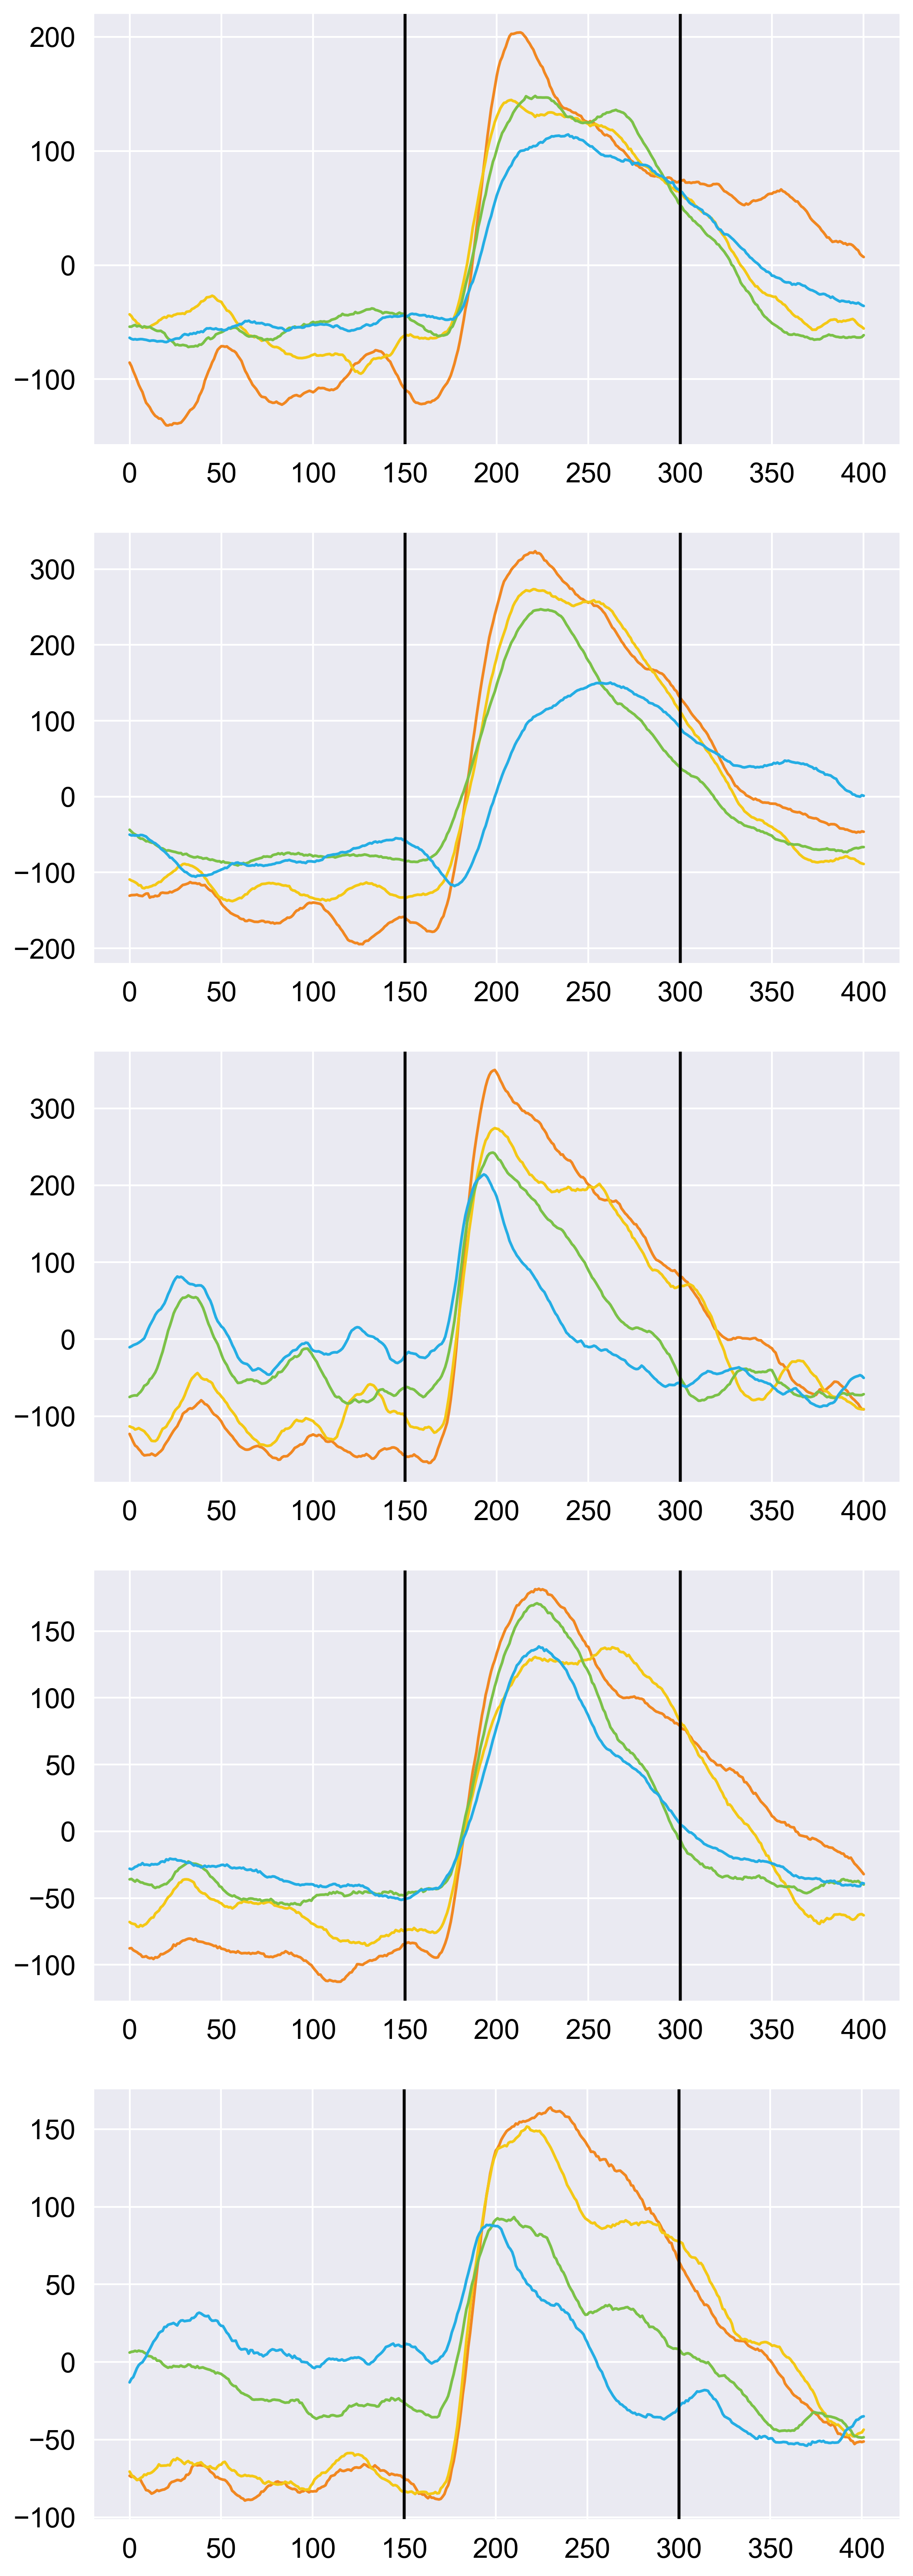

<Figure size 1920x1440 with 0 Axes>

<Figure size 1920x1440 with 0 Axes>

<Figure size 1920x1440 with 0 Axes>

<Figure size 1920x1440 with 0 Axes>

<Figure size 1920x1440 with 0 Axes>

In [217]:
print("Timepoint of maximum PC magnitudes:\n")

fig,ax = plt.subplots(len(data_4),1,figsize=(8,25))

for i in range(len(data_4)):
    print(f"Session {i+1}:")
    sess = data_4[i].spikes[data_4[i].spikes["condition"] == "overt"]
    plt.figure();
    targ_data = []
    for targ in data_4[i].targ_dict.keys():
        pca = PCA(n_components=1)
        trace = pca.fit_transform(np.nanmean(np.array(sess[sess["targ"]==targ].FR.to_list()),axis=0))
        ax[i].plot(trace, label=targ, color=data_4[i].my_color_map[data_4[i].targ_dict[targ]]);
        print(f"{data_4[i].targ_dict[targ]} maximum: {np.nanargmax(trace[135:250]) + 175}") # Look from 500 ms after movement phase start to 2000 ms after movement phase start (reaction time and reasonable reaction frame)
        ax[i].axvline(150, color='black');
        ax[i].axvline(300, color='black');
    print()

SF_NK("P4_PCA_Example")

## D - Firing Rate Example

In [221]:
import MD_Plotting

importlib.reload(MD_Plotting)

from MD_Plotting import single_FR

In [222]:
from MD_Plotting import FR_chan

Note that this is not the same trial, subject, movement type shown in the paper.

It is just an example of how that plot was obtained.

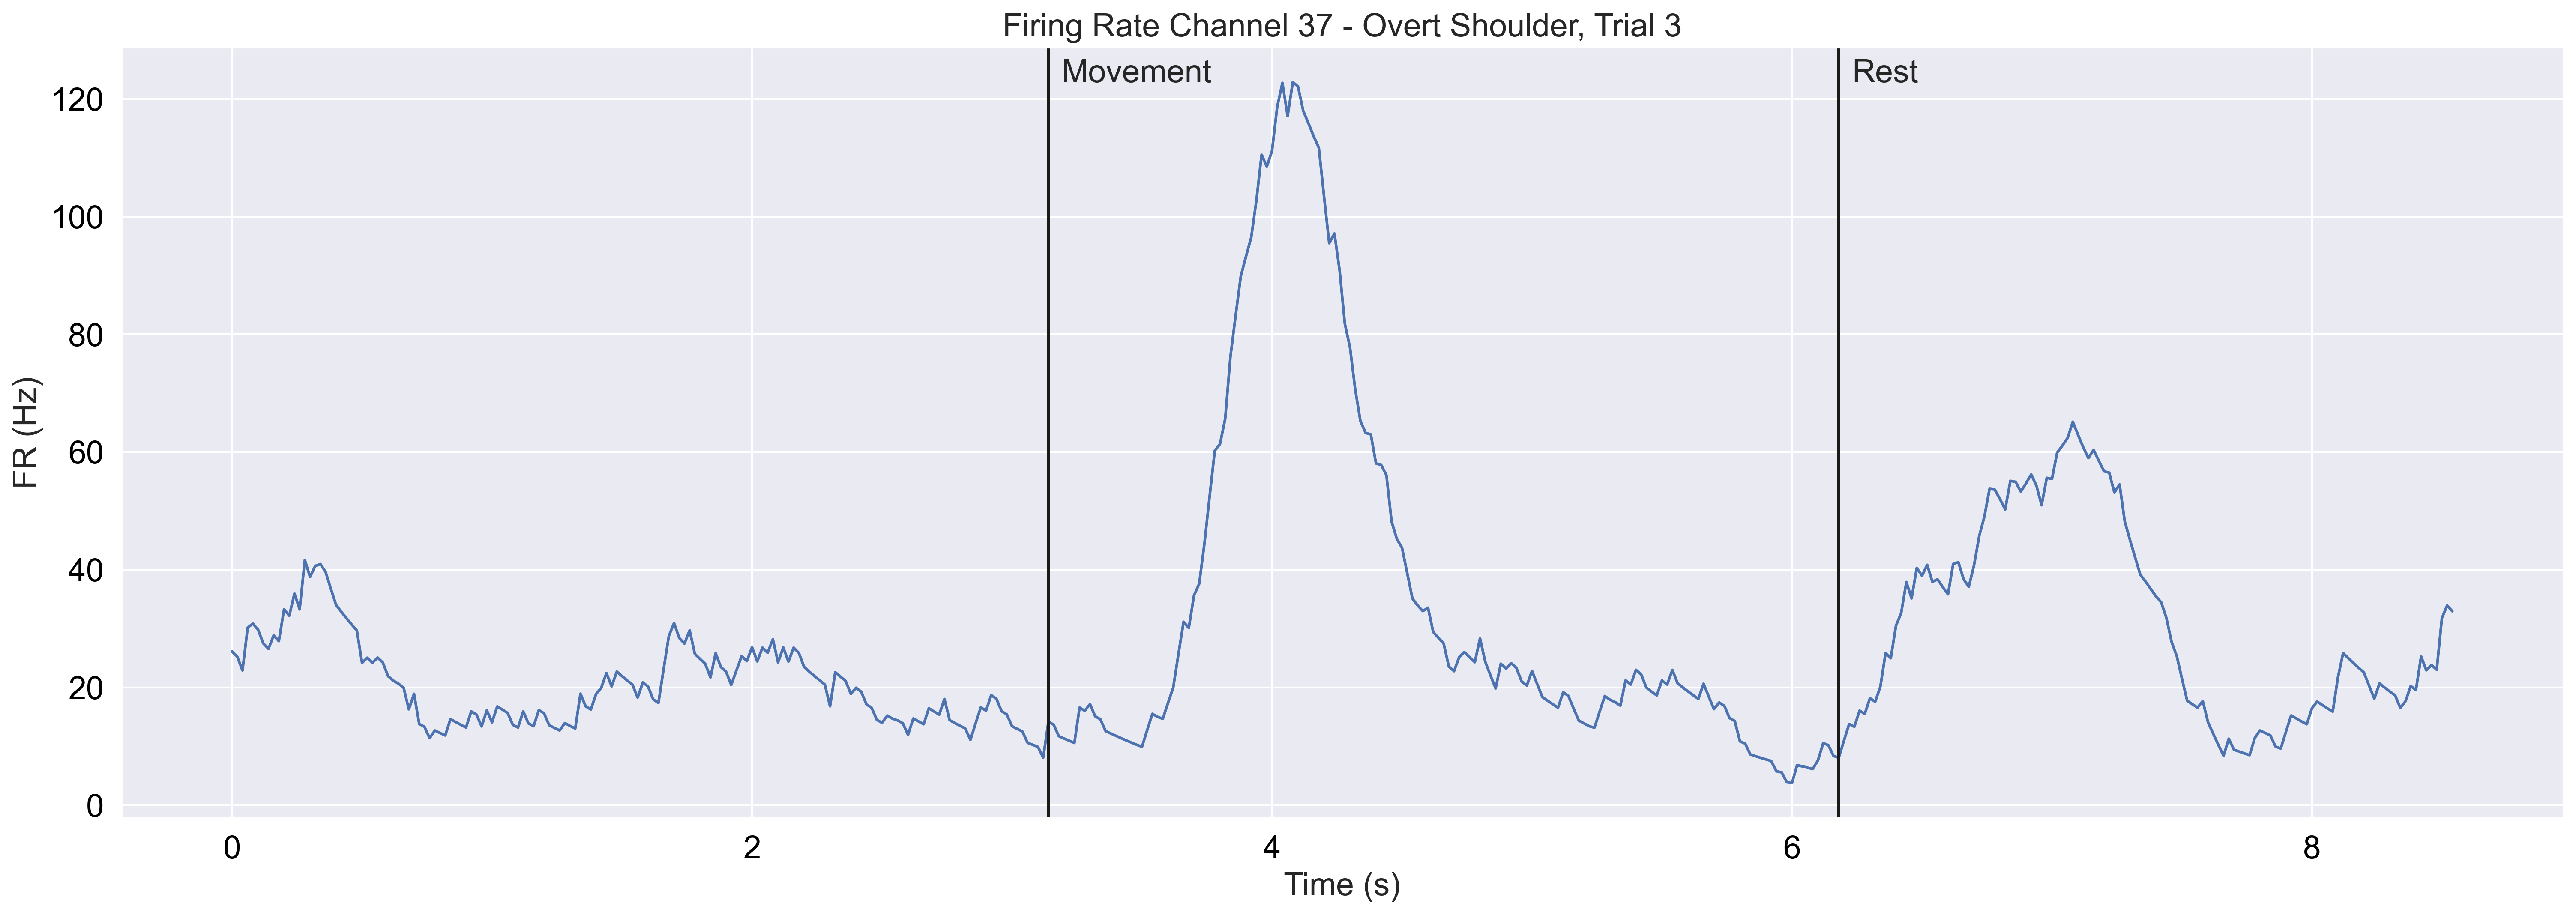

In [239]:
single_FR(data_2[0], 37, 4, 3);

## E - Tuning Example

In [109]:
import MD_Classification
import MD_Tuning
import MD_DOM

importlib.reload(MD_Classification)
importlib.reload(MD_Tuning)
importlib.reload(MD_DOM)

from MD_Classification import NB_classification
from MD_Tuning import chan_sig_map
from MD_DOM import depth_map

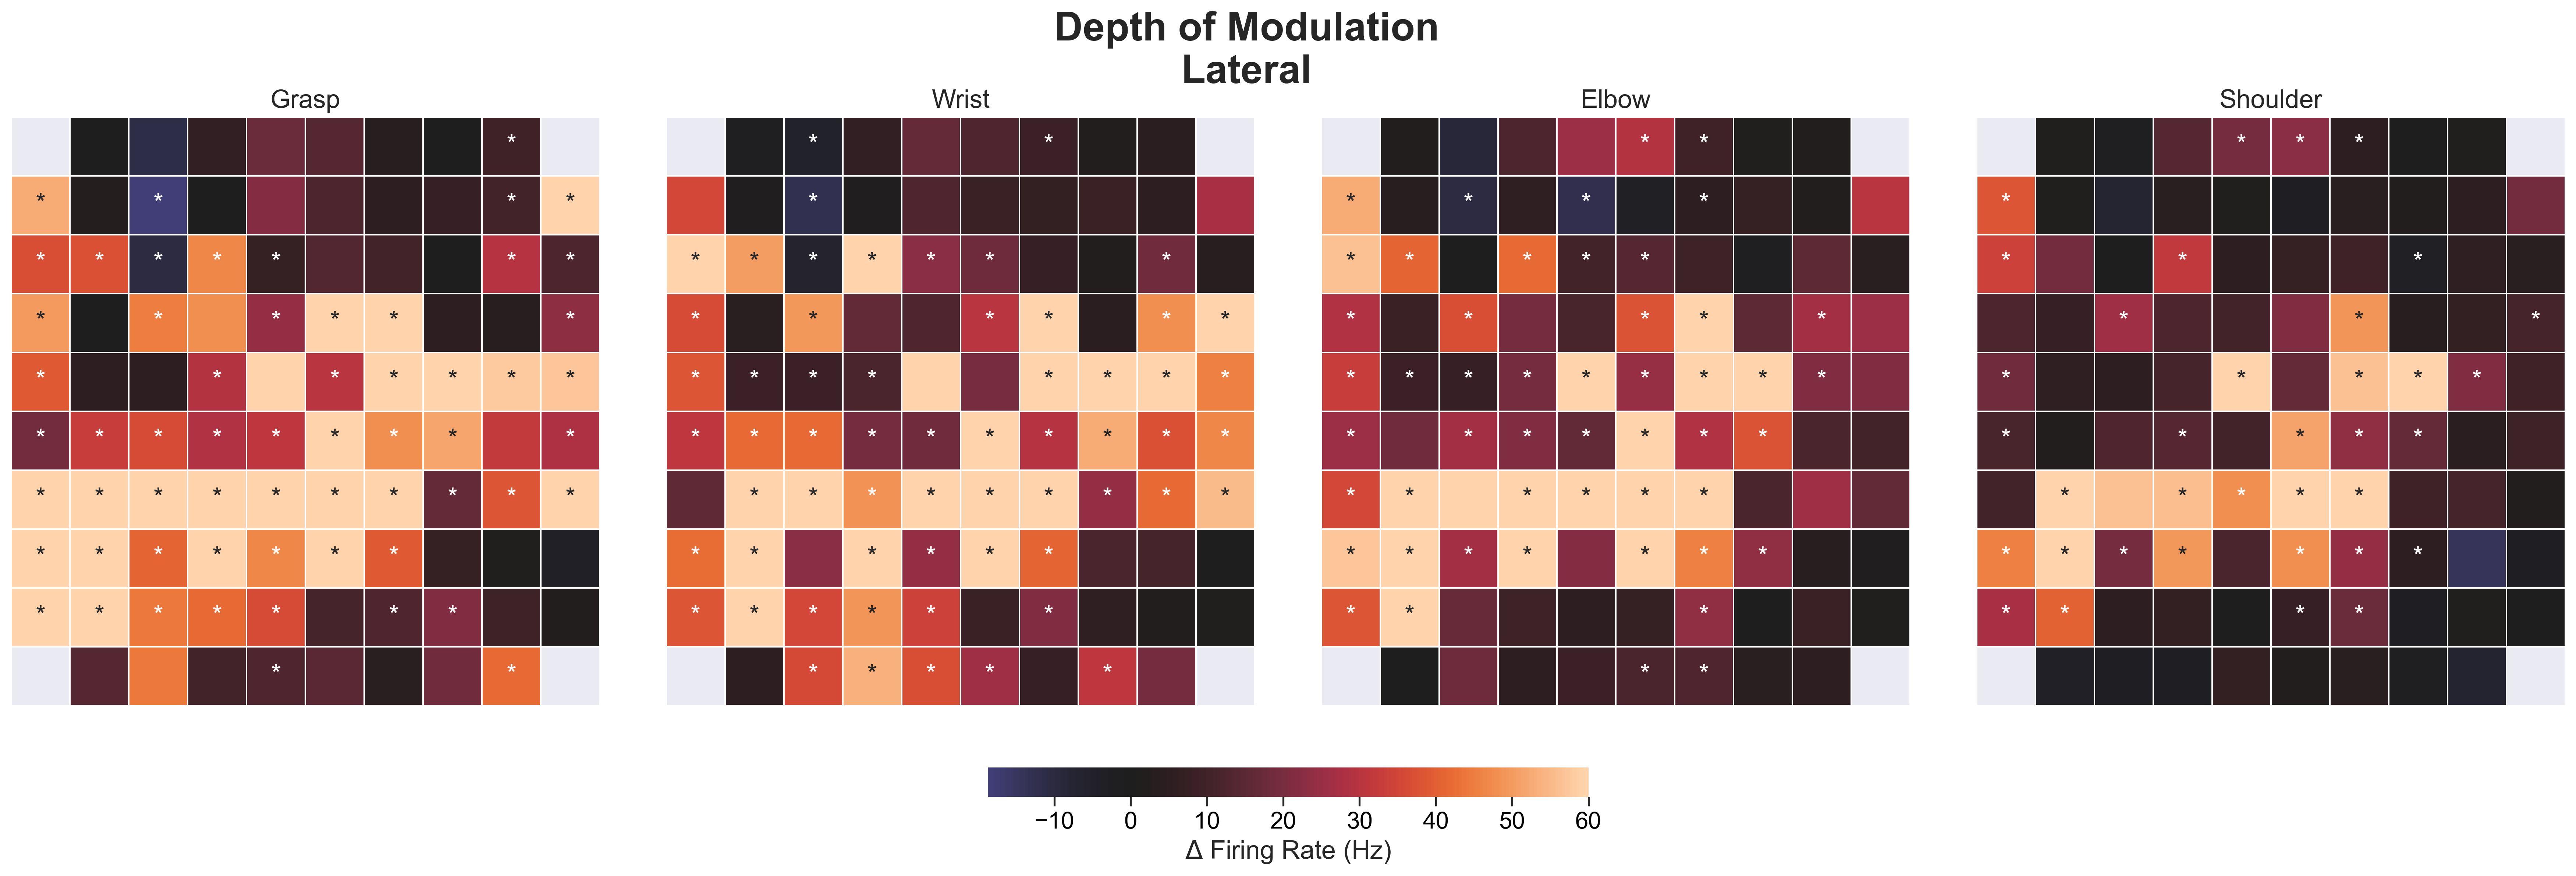

In [19]:
depth_map(data_4[2], 60, medial=False, annotate="significance");

SF_NK("P4_Tuning_Example")

# Figure 3

## A - Tuning Summaries

In [192]:
def tuning_summary(data, subject):
    sig = 0.0125 # 0.05 with a Bonferroni correction for 4 groups
    num_sess = len(data)

    sig_dict_med = {"Grasp":[], "Wrist":[], "Elbow":[], "Shoulder":[]}
    sig_dict_lat = {"Grasp":[], "Wrist":[], "Elbow":[], "Shoulder":[]}

    ct = 1

    for sess in data:
        med_sig = chan_sig_map(sess, sig, medial=True, plot=False, sig_method="window")
        lat_sig = chan_sig_map(sess, sig, medial=False, plot=False, sig_method="window")

        sig_num_med = (med_sig < sig).sum()
        sig_num_lat = (lat_sig < sig).sum()

        total_med_sig = sum(((med_sig < 0.0125).sum(axis=1)).astype(bool))
        total_lat_sig = sum(((lat_sig < 0.0125).sum(axis=1)).astype(bool))

        sig_dict_med["Grasp"].append(sig_num_med["Grasp"]/total_med_sig)
        sig_dict_med["Wrist"].append(sig_num_med["Wrist"]/total_med_sig)
        sig_dict_med["Elbow"].append(sig_num_med["Elbow"]/total_med_sig)
        sig_dict_med["Shoulder"].append(sig_num_med["Shoulder"]/total_med_sig)

        sig_dict_lat["Grasp"].append(sig_num_lat["Grasp"]/total_lat_sig)
        sig_dict_lat["Wrist"].append(sig_num_lat["Wrist"]/total_lat_sig)
        sig_dict_lat["Elbow"].append(sig_num_lat["Elbow"]/total_lat_sig)
        sig_dict_lat["Shoulder"].append(sig_num_lat["Shoulder"]/total_lat_sig)

        print(f"{subject} Session {ct} total medial: {total_med_sig}, total lateral: {total_lat_sig}")

        ct += 1


    sig_df = pd.DataFrame(columns=["Session", "Array", "Grasp", "Wrist", "Elbow", "Shoulder"])

    sig_df["Grasp"] = sig_dict_med["Grasp"] + sig_dict_lat["Grasp"]
    sig_df["Wrist"] = sig_dict_med["Wrist"] + sig_dict_lat["Wrist"]
    sig_df["Elbow"] = sig_dict_med["Elbow"] + sig_dict_lat["Elbow"]
    sig_df["Shoulder"] = sig_dict_med["Shoulder"] + sig_dict_lat["Shoulder"]

    sig_df["Session"] = [x for x in range(1,num_sess+1)]*2

    sig_df["Array"] = ["Medial"]*num_sess + ["Lateral"]*num_sess

    # Convert to long form for plotting
    sig_df_long = pd.melt(sig_df, id_vars=["Session", "Array"], value_vars=["Grasp", "Wrist", "Elbow", "Shoulder"])

    # Plot the number of significant channels for each session and color based on data[0].my_color_map
    plt.figure(figsize=(10,6))
    sns.swarmplot(x="variable", y="value", hue="Array", data=sig_df_long, palette={"Medial":"blue", "Lateral":"orangered"})
    plt.xlabel("Movement Target")
    plt.ylabel("Proportion of Significantly-Tuned Channels")
    plt.title(f"{subject}")

    # Add points for mean values for each of the 8 clusters of points

    # Calculate the mean values for each of the 8 clusters of points
    sig_df_med = sig_df.loc[sig_df["Array"] == "Medial"]
    sig_df_lat = sig_df.loc[sig_df["Array"] == "Lateral"]

    mean_vals_med = sig_df_med.drop(["Session", "Array"], axis=1).mean()
    mean_vals_lat = sig_df_lat.drop(["Session", "Array"], axis=1).mean()

    # Plot the mean values for each of the 8 clusters of points
    plt.scatter([0,1,2,3], mean_vals_med, color="blue", marker="_", linewidths=1.5, s=400)
    plt.scatter([0,1,2,3], mean_vals_lat, color="orangered", marker="_", linewidths=1.5, s=400)

    # Plot a line between means of adjacent clusters - medial and lateral separately
    for i in range(3):
        plt.plot([i,i+1], [mean_vals_med.iloc[i], mean_vals_med.iloc[i+1]], color="blue")
        plt.plot([i,i+1], [mean_vals_lat.iloc[i], mean_vals_lat.iloc[i+1]], color="orangered")

    plt.ylim(0,1)



    SF_NK(f"{subject}_Tuning")

    return sig_df_long

In [23]:
P2_num = 88
P34_num = 96

P2_lat_counts = [49, 43, 36, 35, 27]
P2_med_counts = [36, 62, 44, 41, 25]

P3_lat_counts = [66, 62, 40, 39, 59]
P3_med_counts = [61, 66, 25, 30, 28]

P4_lat_counts = [80, 90, 80, 77, 67]
P4_med_counts = [51, 70, 39, 74, 22]

P2_lat = [x/P2_num for x in P2_lat_counts]
P2_med = [x/P2_num for x in P2_med_counts]

P3_lat = [x/P34_num for x in P3_lat_counts]
P3_med = [x/P34_num for x in P3_med_counts]

P2_min_lat = [27/P2_num]
P2_min_med = [25/P2_num]
P2_max_lat = [49/P2_num]
P2_max_med = [62/P2_num]

P3_min_lat = [39/P34_num]
P3_min_med = [25/P34_num]
P3_max_lat = [66/P34_num]
P3_max_med = [66/P34_num]

P4_lat = [x/P34_num for x in P4_lat_counts]
P4_med = [x/P34_num for x in P4_med_counts]

P4_min_lat = [67/P34_num]
P4_min_med = [22/P34_num]
P4_max_lat = [90/P34_num]
P4_max_med = [70/P34_num]

print("P2:")
print(f"Mean Medial: {np.mean(P2_med)}")
print(f"Mean Lateral: {np.mean(P2_lat)}")
print(f"Min: {P2_min_med[0]}, Max: {P2_max_med[0]}")
print()
print("P3:")
print(f"Mean Medial: {np.mean(P3_med)}")
print(f"Mean Lateral: {np.mean(P3_lat)}")
print(f"Min: {P3_min_med[0]}, Max: {P3_max_med[0]}")
print()
print("P4:")
print(f"Mean Medial: {np.mean(P4_med)}")
print(f"Mean Lateral: {np.mean(P4_lat)}")
print(f"Min: {P4_min_med[0]}, Max: {P4_max_med[0]}")

P2:
Mean Medial: 0.4727272727272728
Mean Lateral: 0.4318181818181818
Min: 0.2840909090909091, Max: 0.7045454545454546

P3:
Mean Medial: 0.4375
Mean Lateral: 0.5541666666666667
Min: 0.2604166666666667, Max: 0.6875

P4:
Mean Medial: 0.5333333333333333
Mean Lateral: 0.8208333333333334
Min: 0.22916666666666666, Max: 0.7291666666666666


P2 Session 1 total medial: 36, total lateral: 49
P2 Session 2 total medial: 62, total lateral: 43
P2 Session 3 total medial: 44, total lateral: 36
P2 Session 4 total medial: 41, total lateral: 35
P2 Session 5 total medial: 25, total lateral: 27


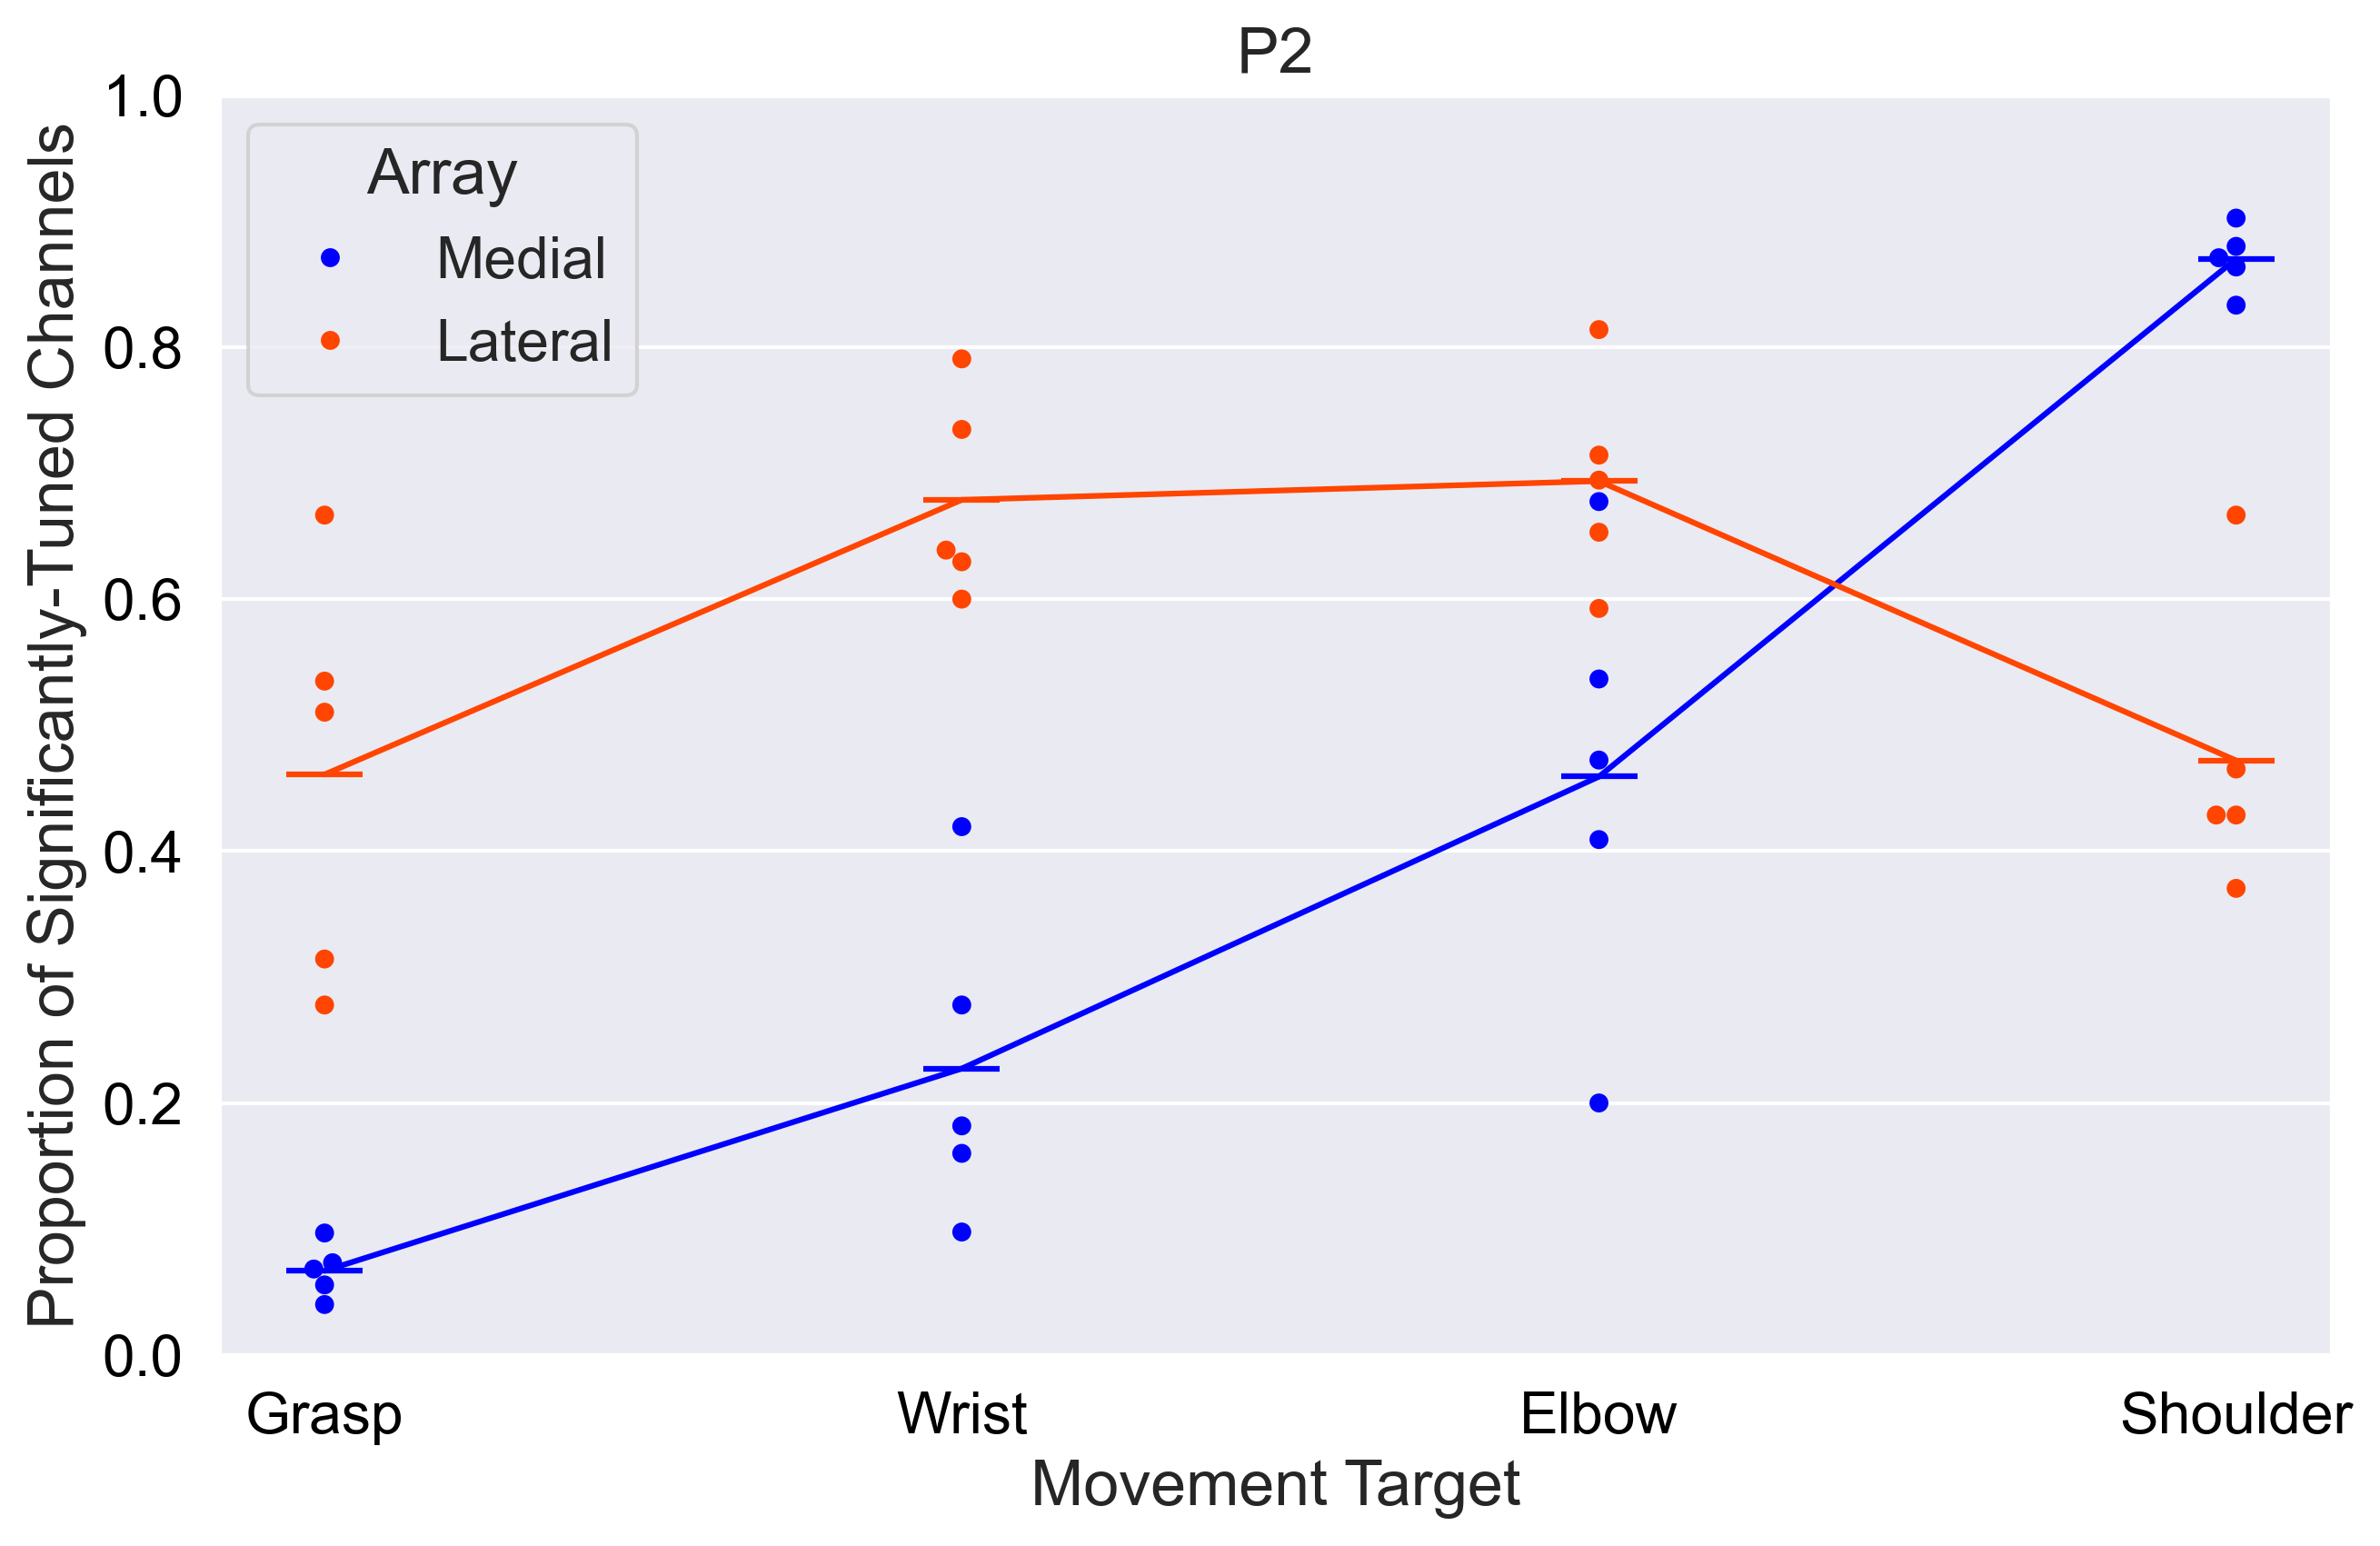

In [193]:
test_2 = tuning_summary(data_2, "P2");

P3 Session 1 total medial: 61, total lateral: 66
P3 Session 2 total medial: 66, total lateral: 62
P3 Session 3 total medial: 25, total lateral: 40
P3 Session 4 total medial: 30, total lateral: 39
P3 Session 5 total medial: 28, total lateral: 59


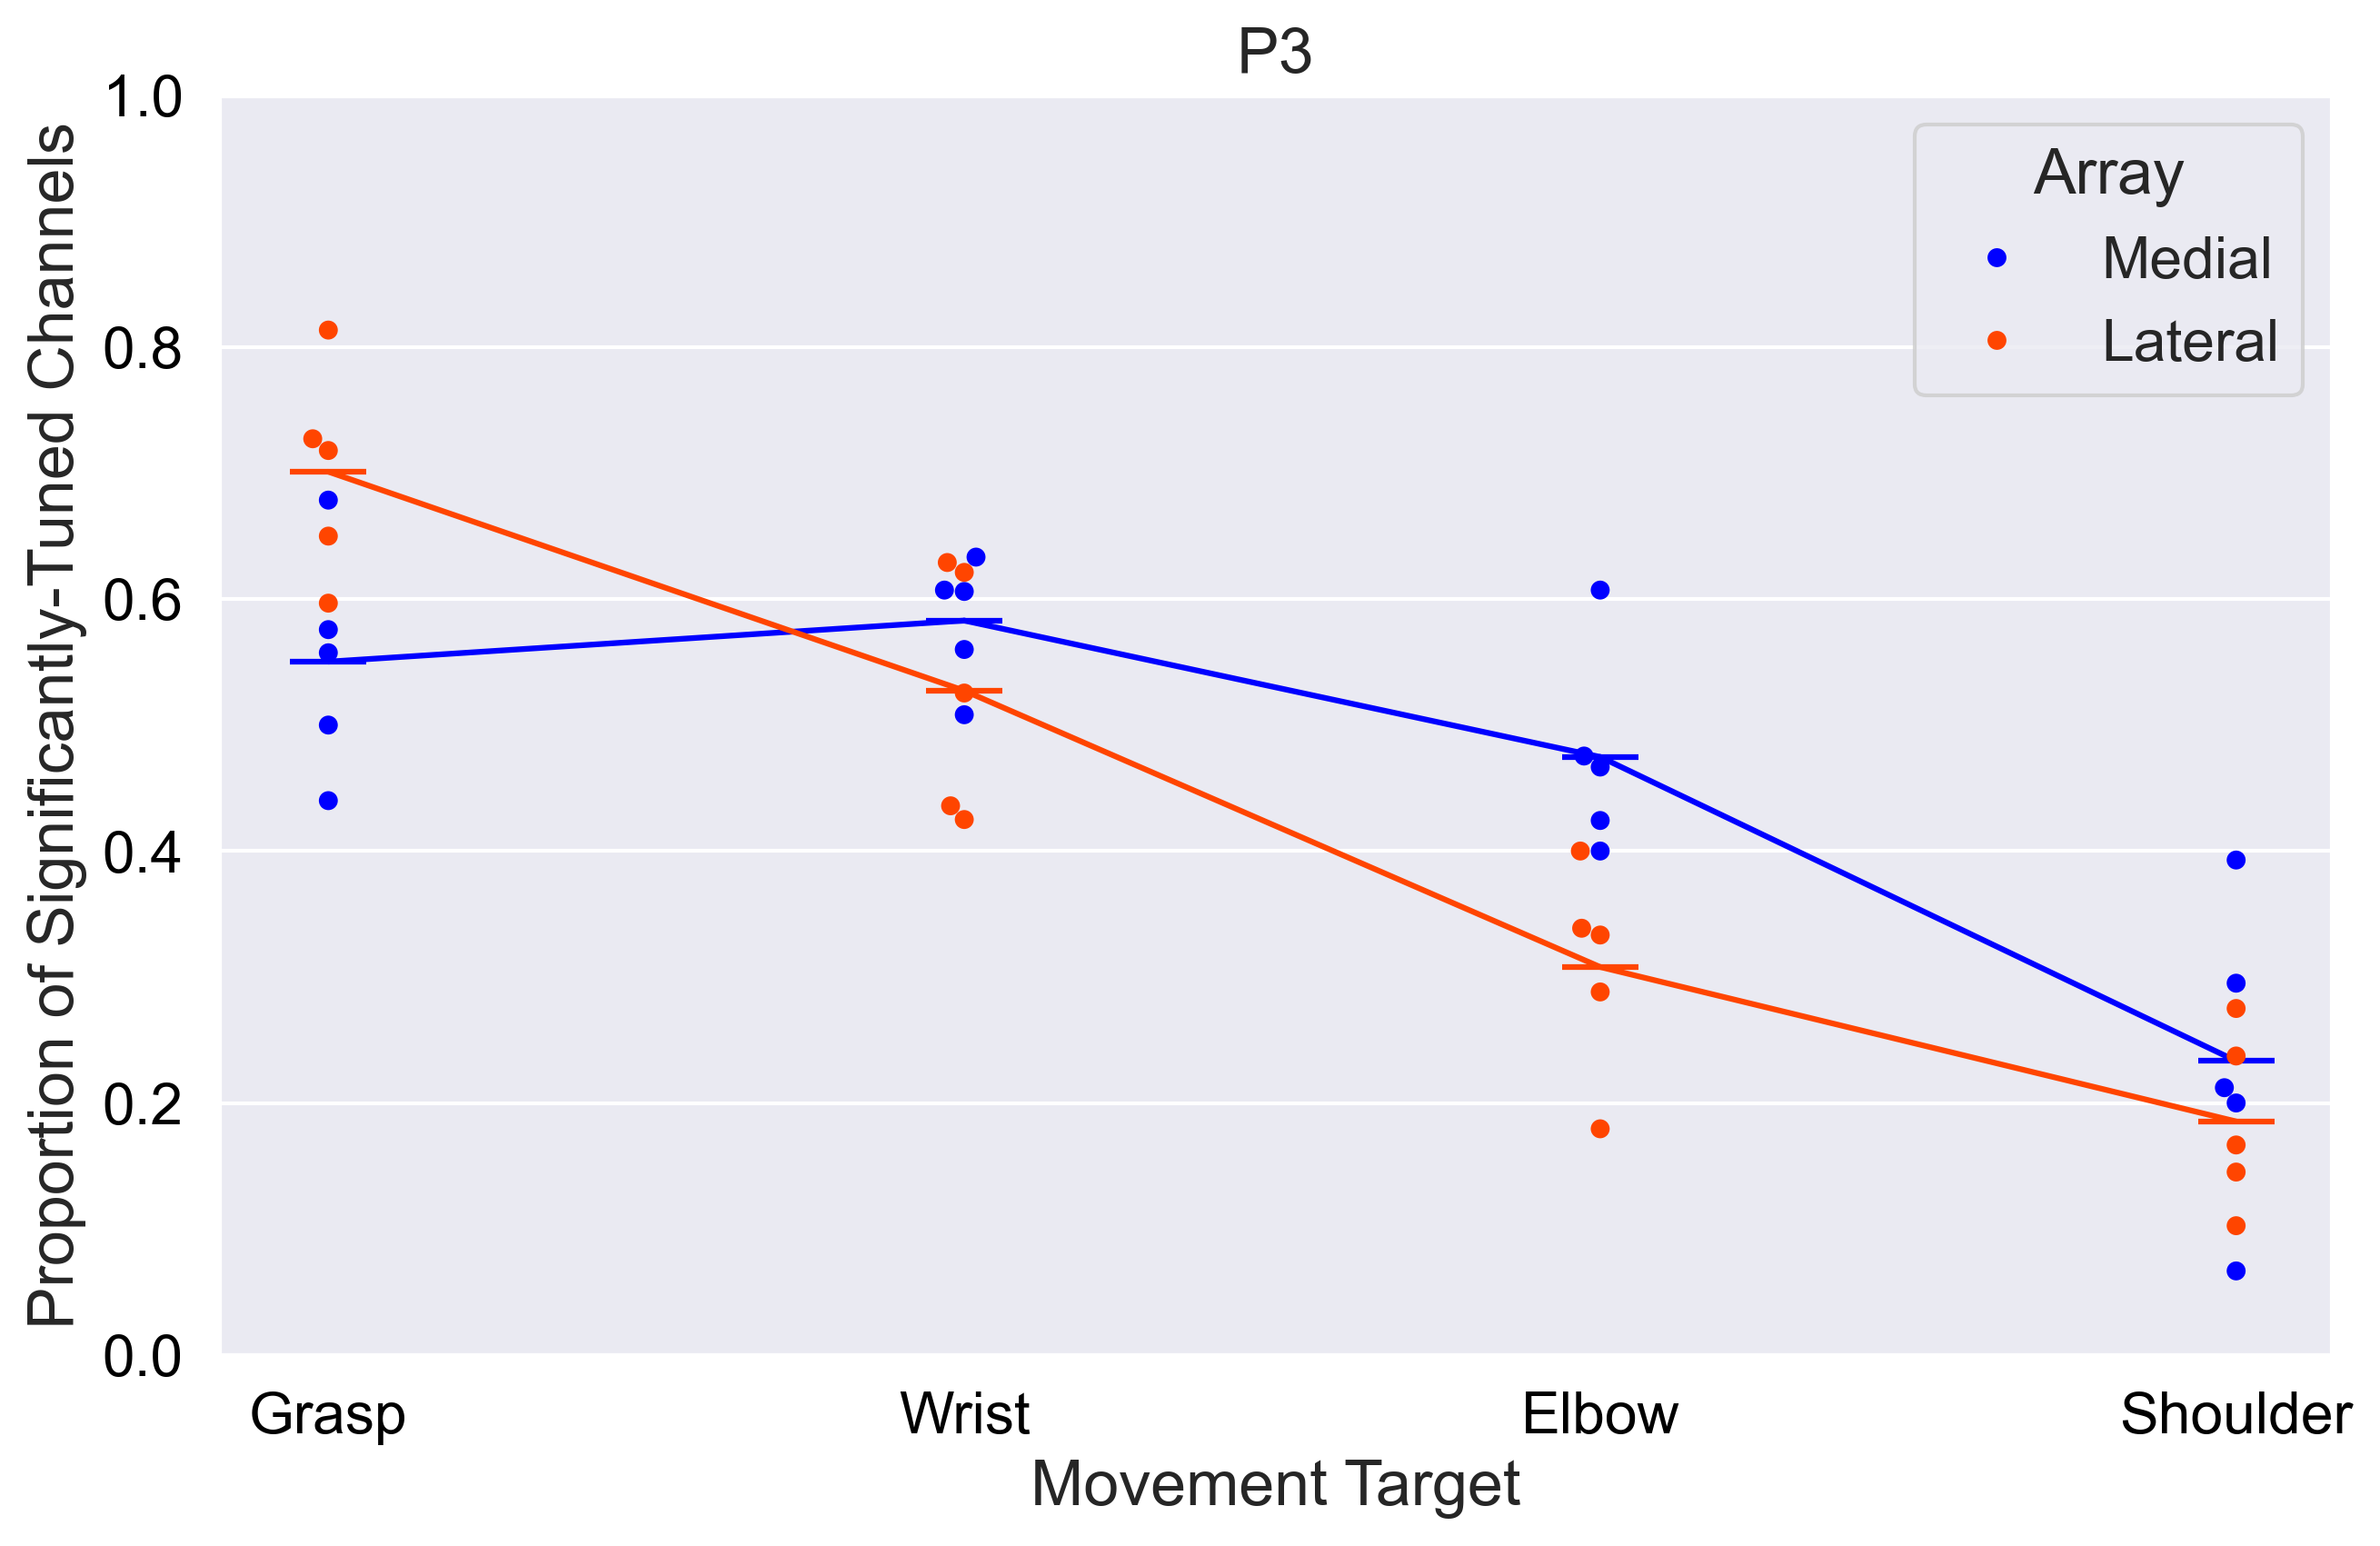

In [194]:
test_7 = tuning_summary(data_3, "P3");

P4 Session 1 total medial: 51, total lateral: 80
P4 Session 2 total medial: 70, total lateral: 90
P4 Session 3 total medial: 39, total lateral: 80
P4 Session 4 total medial: 74, total lateral: 77
P4 Session 5 total medial: 22, total lateral: 67


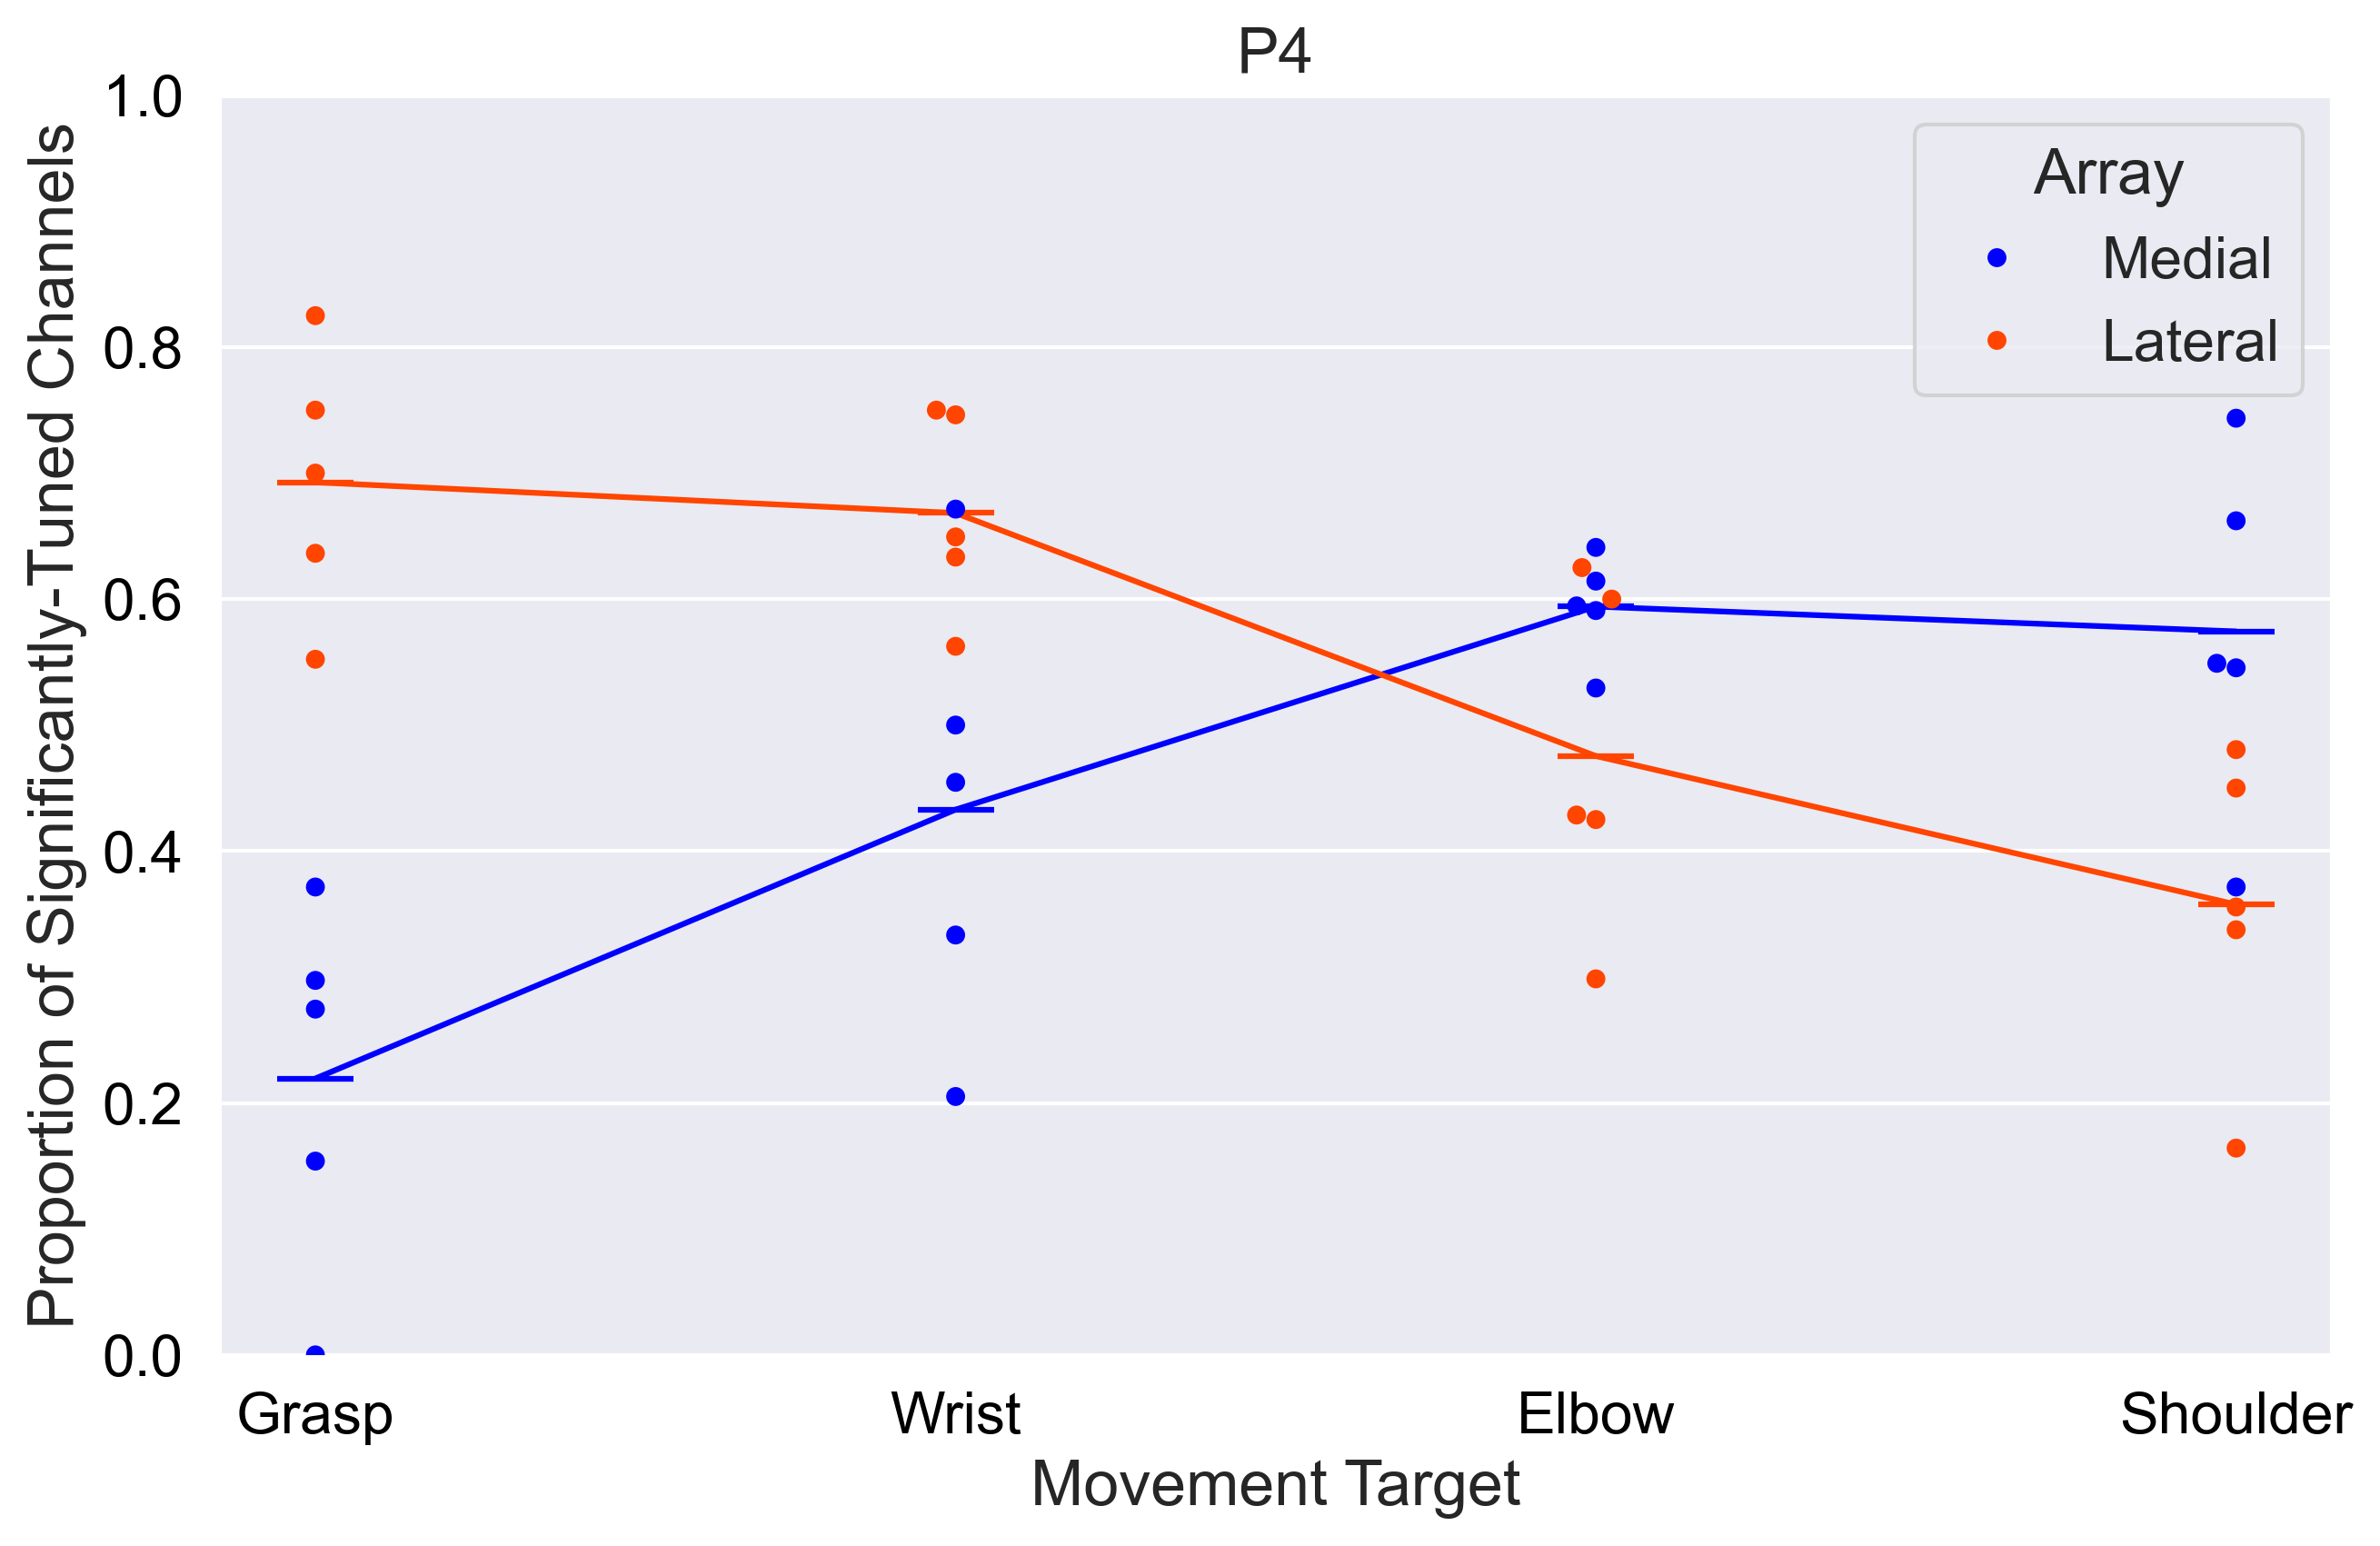

In [195]:
test_8 = tuning_summary(data_4, "P4");

## B - Naive Bayes Classification

In [111]:
def NB_plot(data, subject):

    # Run classification
    LL_sess = []
    z_sess = []
    confusion_sess = []

    for sess in data:
        conf, z, confusion = NB_classification(sess)
        LL_sess.append(conf)
        z_sess.append(z)
        confusion_sess.append(confusion)

    # Plot confusion matrix
    
    total_confusion = np.sum(np.array(confusion_sess), axis=0)

    print()
    print(total_confusion)

    heatplot = sns.heatmap(total_confusion, annot=True, vmin=0, vmax=100, cmap="Greys_r")
    plt.ylabel("True Movement")
    plt.xlabel("Predicted Movement")
    plt.title(f"{subject} Confusion Matrix - All Sessions")

    # Set colorbar label
    colorbar = heatplot.collections[0].colorbar
    colorbar.set_label("Count")

    heatplot.set_yticklabels(["Grasp", "Wrist", "Elbow", "Shoulder"]);
    heatplot.set_xticklabels(["Grasp", "Wrist", "Elbow", "Shoulder"]);

    SF_NK(f"{subject}_NB_Class_Confusion")

77/80 trials correctly classified
96.25% accuracy
71/80 trials correctly classified
88.75% accuracy
71/80 trials correctly classified
88.75% accuracy
71/80 trials correctly classified
88.75% accuracy
63/80 trials correctly classified
78.75% accuracy

[[79. 12.  9.  0.]
 [ 5. 88.  6.  1.]
 [ 0.  4. 93.  3.]
 [ 3.  1.  3. 93.]]


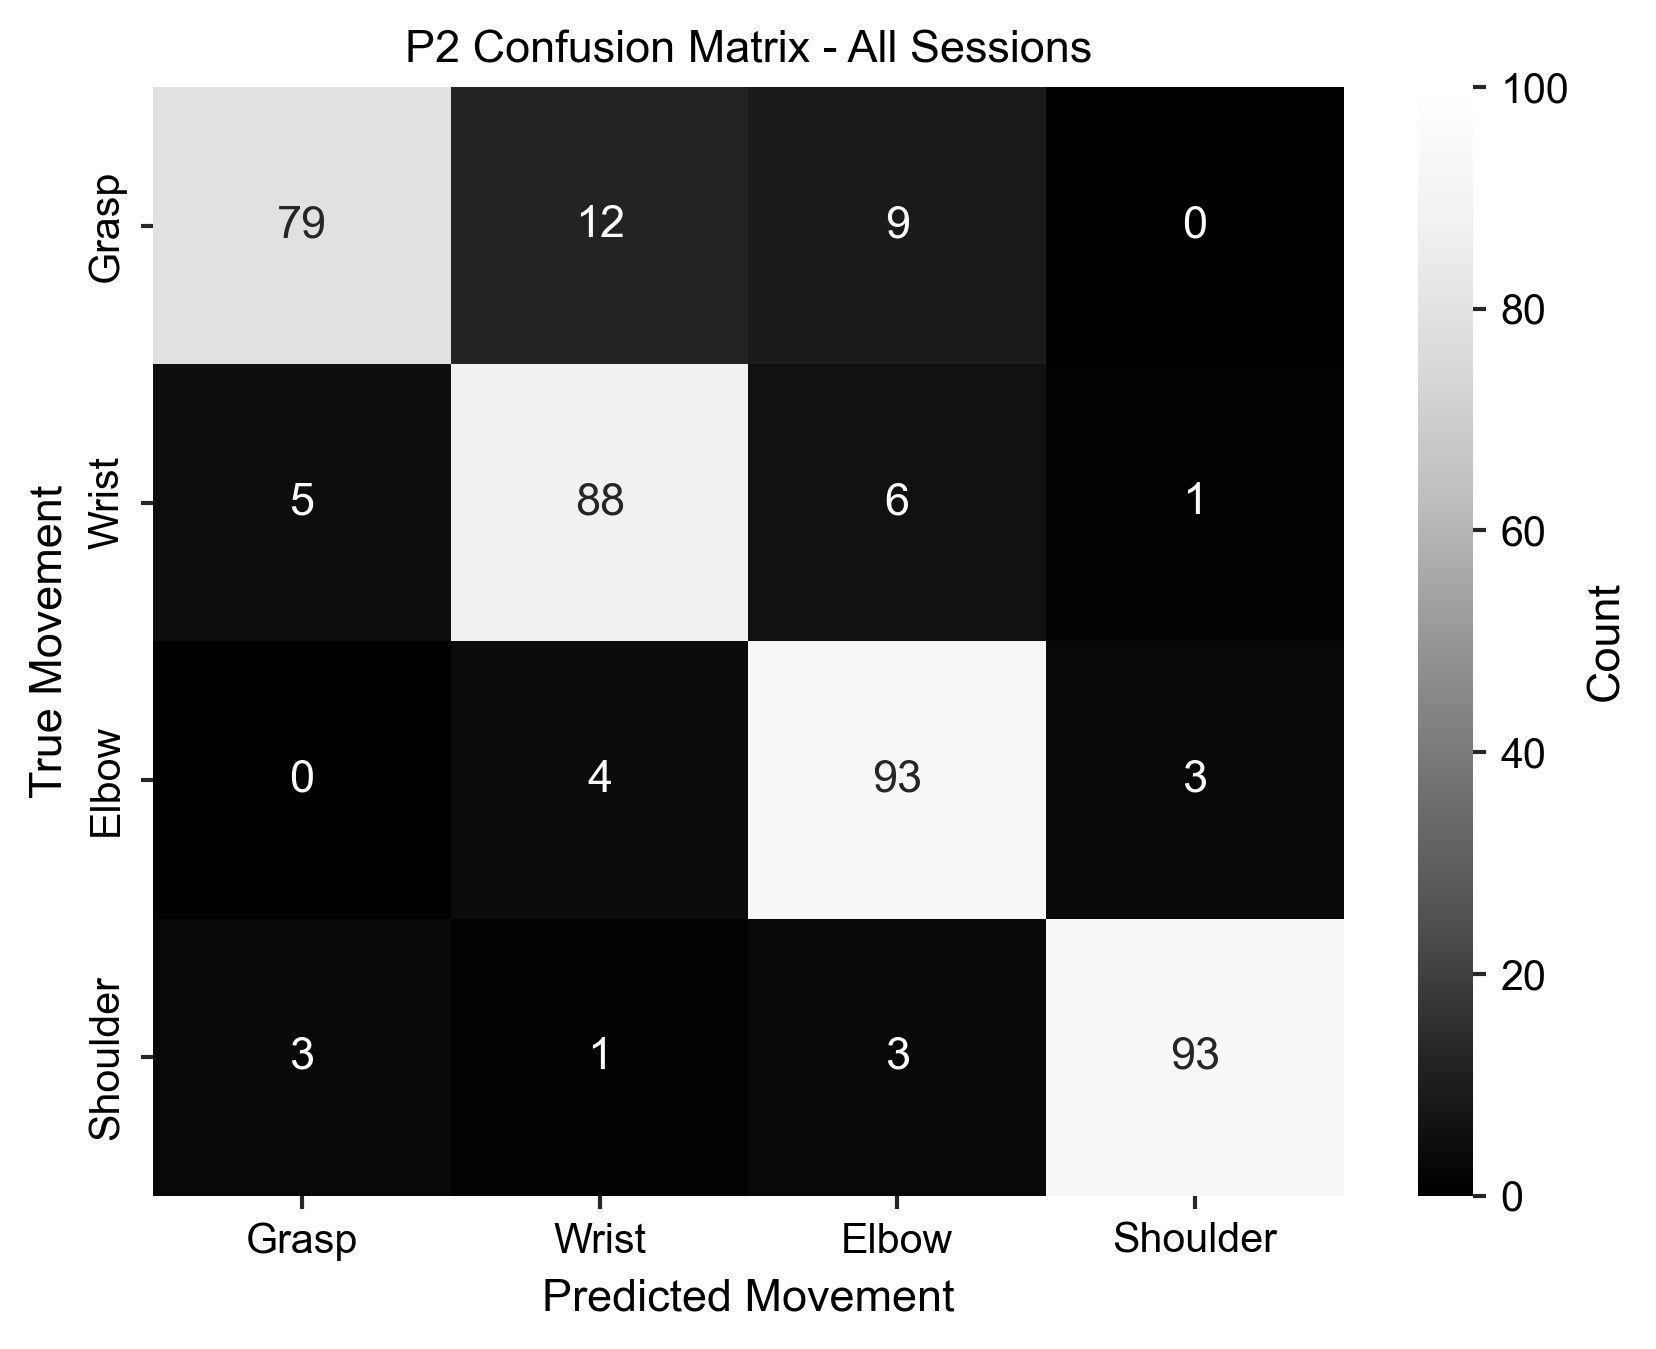

In [112]:
NB_plot(data_2, "P2")

75/80 trials correctly classified
93.75% accuracy
73/80 trials correctly classified
91.25% accuracy
71/78 trials correctly classified
91.02564102564102% accuracy
67/77 trials correctly classified
87.01298701298701% accuracy
73/80 trials correctly classified
91.25% accuracy

[[91.  4.  0.  4.]
 [ 4. 92.  3.  0.]
 [ 1.  8. 85.  4.]
 [ 0.  1.  7. 91.]]


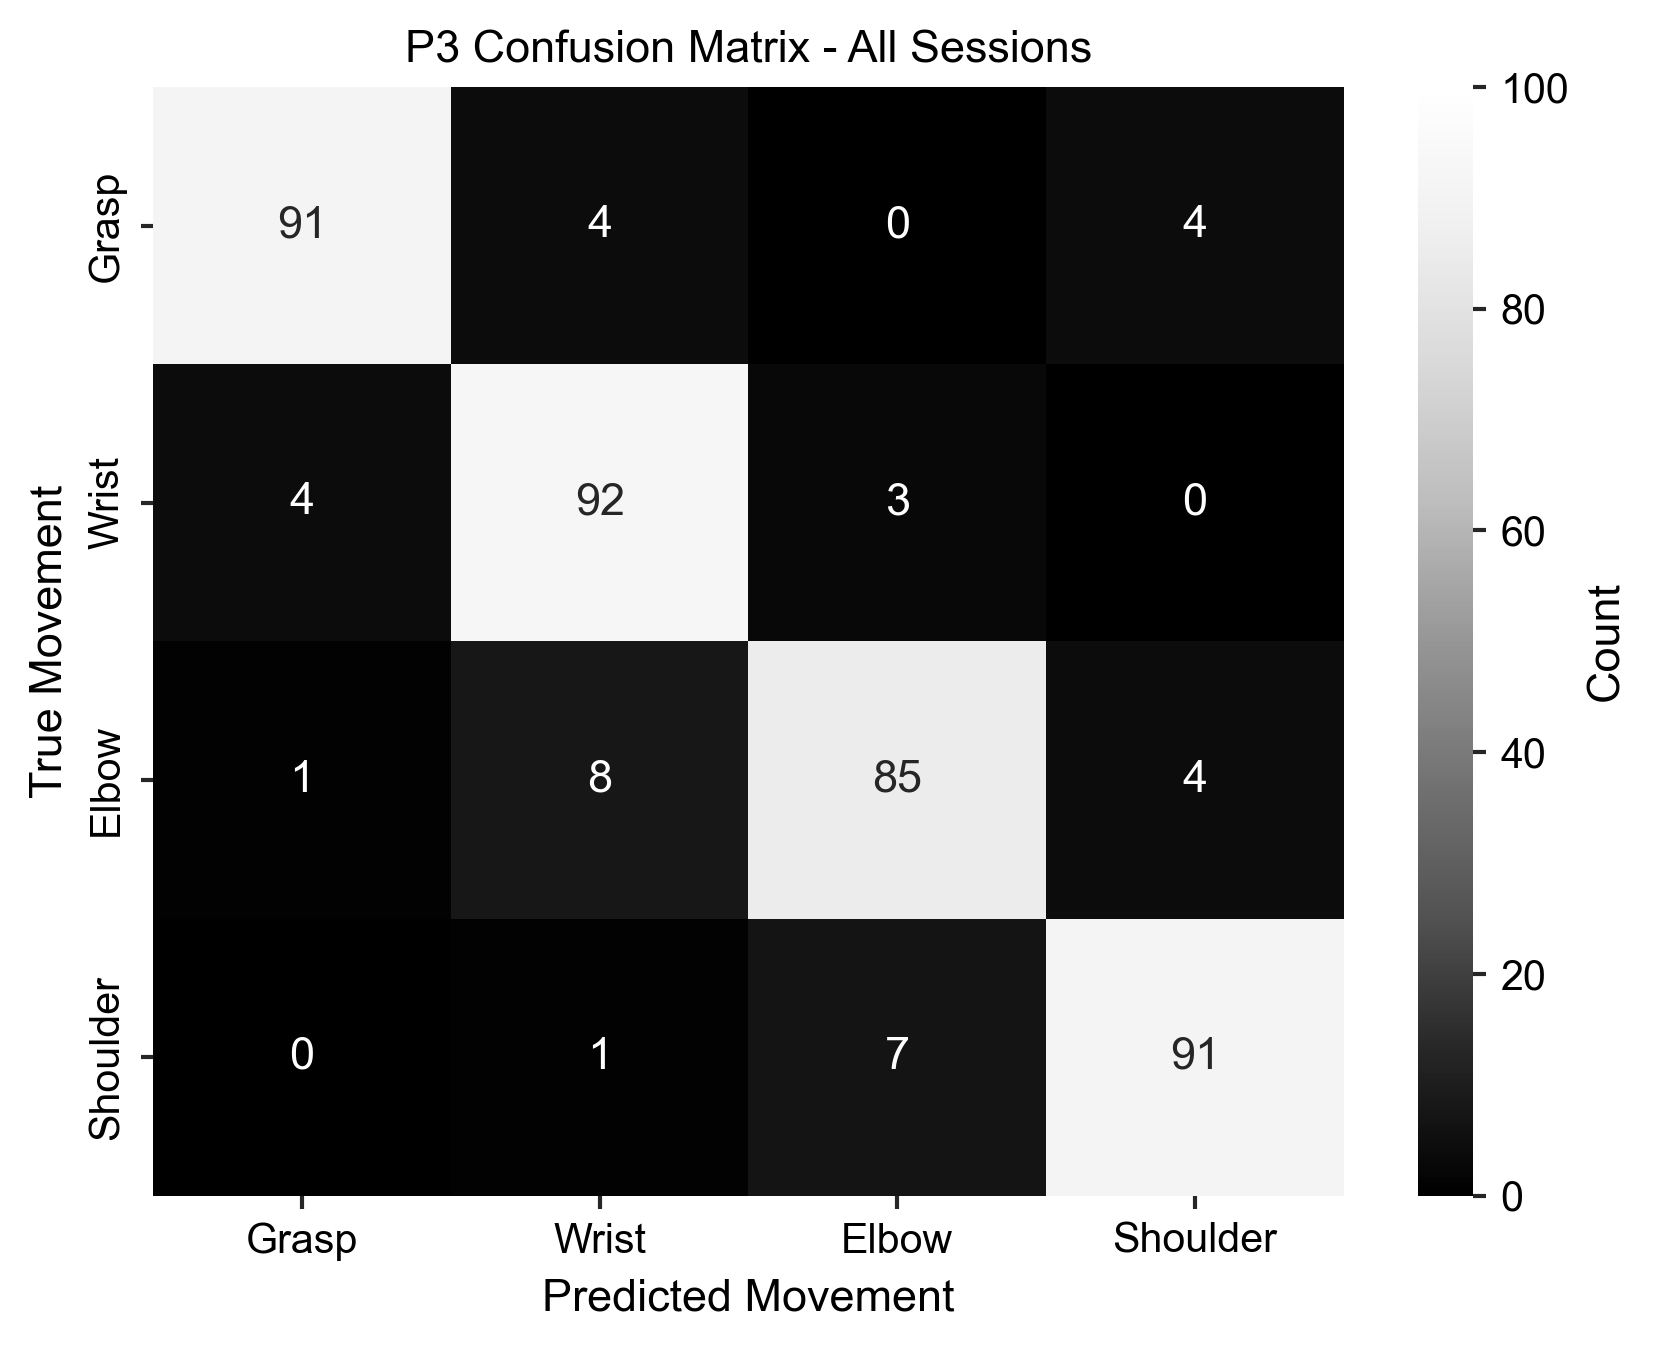

In [113]:
NB_plot(data_3, "P3")

67/80 trials correctly classified
83.75% accuracy
72/80 trials correctly classified
90.0% accuracy
59/80 trials correctly classified
73.75% accuracy
65/80 trials correctly classified
81.25% accuracy
59/79 trials correctly classified
74.68354430379746% accuracy

[[92.  1.  5.  2.]
 [ 7. 80.  8.  5.]
 [ 3.  5. 71. 21.]
 [ 3.  1. 16. 79.]]


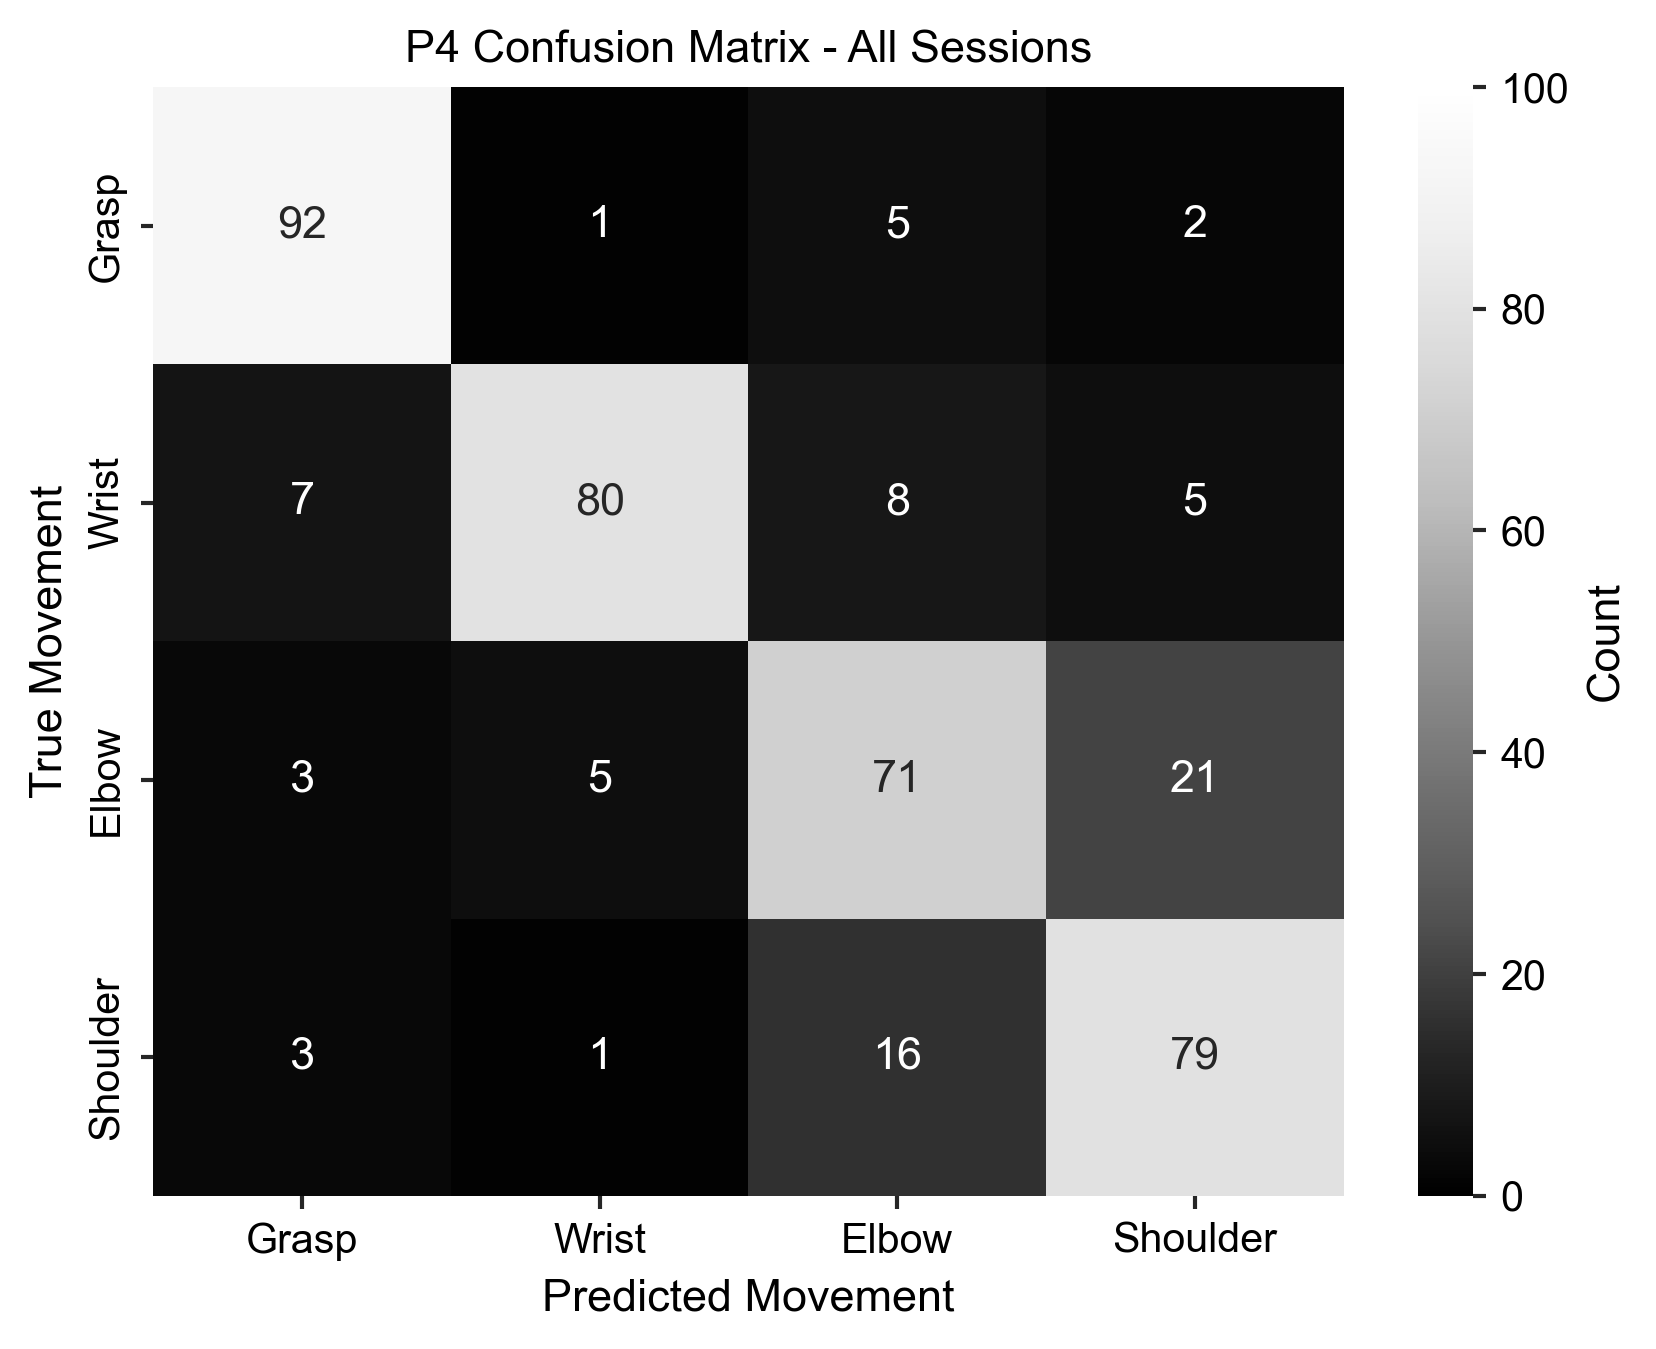

In [114]:
NB_plot(data_4, "P4")

# Figure 4 - Virtual Arm & Hand Decoding

## B - Translation Decoding

In [62]:
# Load data

data_path = loadmat(f".//Data//...") # COMPLETE

R2_2 = loadmat(data_path + "P2_Obs_R2.mat")
R2_3 = loadmat(data_path + "P3_Obs_R2.mat")
R2_4 = loadmat(data_path + "P4_Obs_R2.mat")

In [63]:
# Format data

R2_2_block_med = R2_2['R2_2_block_med'][0]
R2_2_block_lat = R2_2['R2_2_block_lat'][0]
R2_2 = R2_2["R2_2"][0]

R2_3_block_med = R2_3['R2_3_block_med'][0]
R2_3_block_lat = R2_3['R2_3_block_lat'][0]
R2_3 = R2_3["R2_3"][0]

R2_4_block_med = R2_4['R2_8_block_med'][0]
R2_4_block_lat = R2_4['R2_8_block_lat'][0]
R2_4 = R2_4["R2_8"][0]

In [67]:
print(len(R2_2), len(R2_3), len(R2_4))

43 45 21


In [68]:
# Remove invalid sessions

inval_2 = np.isnan(R2_2) + np.isnan(R2_2_block_lat) + np.isnan(R2_2_block_med)
inval_3 = np.isnan(R2_3) + np.isnan(R2_3_block_lat) + np.isnan(R2_3_block_med)
inval_4 = np.isnan(R2_4) + np.isnan(R2_4_block_lat) + np.isnan(R2_4_block_med)

R2_2 = R2_2[~inval_2]
R2_2_block_lat = R2_2_block_lat[~inval_2]
R2_2_block_med = R2_2_block_med[~inval_2]

R2_3 = R2_3[~inval_3]
R2_3_block_lat = R2_3_block_lat[~inval_3]
R2_3_block_med = R2_3_block_med[~inval_3]

R2_4 = R2_4[~inval_4]
R2_4_block_lat = R2_4_block_lat[~inval_4]
R2_4_block_med = R2_4_block_med[~inval_4]

In [69]:
print(len(R2_2), len(R2_3), len(R2_4))

42 45 19


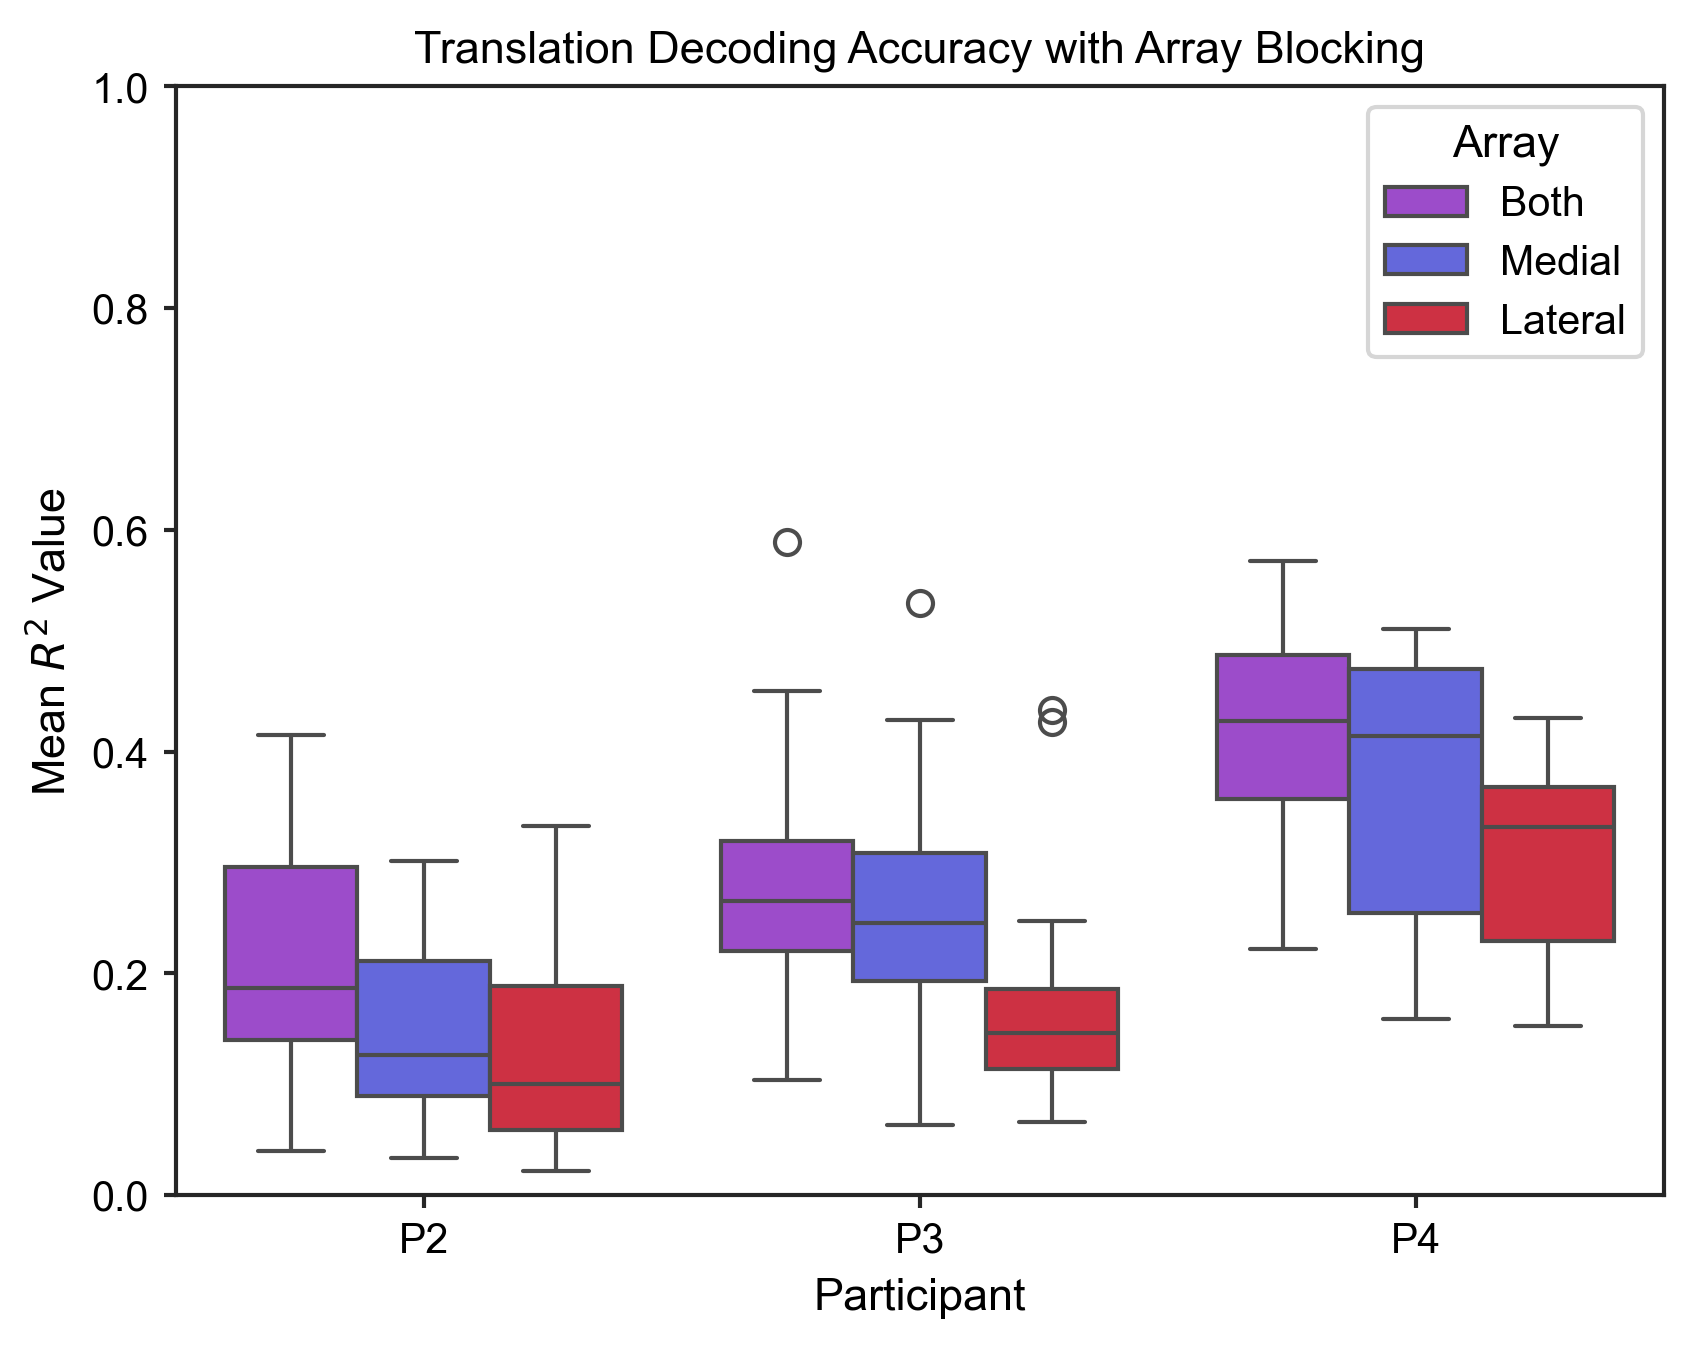

In [14]:
# Plot raw data

# Combine the accs and blocking data into one dataframe with all 3 participants
df_Arm_Translation = pd.DataFrame({'Accuracy': np.concatenate([R2_2, R2_3, R2_4]), 'Participant': ['P2']*len(R2_2) + ['P3']*len(R2_3) + ['P4']*len(R2_4), 'Array': ['Both']*len(R2_2) + ['Both']*len(R2_3) + ['Both']*len(R2_4)})

# Add blocking data
df_Arm_Translation = pd.concat((df_Arm_Translation, pd.DataFrame({'Accuracy': np.concatenate([R2_2_block_lat, R2_2_block_med, R2_3_block_lat, R2_3_block_med, R2_4_block_lat, R2_4_block_med]), 'Participant': ['P2']*len(R2_2_block_lat) + ['P2']*len(R2_2_block_med) + ['P3']*len(R2_3_block_lat) + ['P3']*len(R2_3_block_med) + ['P4']*len(R2_4_block_lat) + ['P4']*len(R2_4_block_med), 'Array': ['Medial']*len(R2_2_block_lat) + ['Lateral']*len(R2_2_block_med) + ['Medial']*len(R2_3_block_lat) + ['Lateral']*len(R2_3_block_med) + ['Medial']*len(R2_4_block_lat) + ['Lateral']*len(R2_4_block_med)})), ignore_index=True)

# Plot in a grouped boxplot
sns.boxplot(data=df_Arm_Translation, x='Participant', y='Accuracy', hue='Array', palette=array_colors)
plt.title('Translation Decoding Accuracy with Array Blocking')
plt.ylabel('Mean $R^2$ Value')
plt.ylim([0, 1])

SF_NK("Translation_Blocking_RIOLEd")

In [15]:
changes_and_stats(df_Arm_Translation)

Median percent change in decoding accuracies:
P2: Medial: -32.19%, Lateral: -46.46%
P3: Medial: -7.61%, Lateral: -45.11%
P4: Medial: -3.19%, Lateral: -22.27%

Friedman test: 
P2:  FriedmanchisquareResult(statistic=63.47619047619048, pvalue=1.645585197013837e-14)
P3:  FriedmanchisquareResult(statistic=72.9333333333334, pvalue=1.454547449887363e-16)
P4:  FriedmanchisquareResult(statistic=26.823529411764696, pvalue=1.4974233315716902e-06)

Wilcoxon signed-rank tests: 
P2: 
Medial vs. Both:  WilcoxonResult(statistic=3.0, pvalue=2.2737367544323206e-12)
Lateral vs. Both:  WilcoxonResult(statistic=0.0, pvalue=4.547473508864641e-13)
Medial vs. Lateral:  WilcoxonResult(statistic=239.0, pvalue=0.007091914743341476)
P3: 
Medial vs. Both:  WilcoxonResult(statistic=71.0, pvalue=1.8686364455788862e-08)
Lateral vs. Both:  WilcoxonResult(statistic=0.0, pvalue=5.684341886080802e-14)
Medial vs. Lateral:  WilcoxonResult(statistic=20.0, pvalue=2.1088908397359774e-11)
P4: 
Medial vs. Both:  WilcoxonResult(

## C - Grasp Decoding

In [16]:
# P2
grasp_2 = loadmat(f".//Data//...") # COMPLETE

In [17]:
accs_2 = grasp_2['R2_2'][0]
accs_2_block_lat = grasp_2['R2_2_block_lat'][0]
accs_2_block_med = grasp_2['R2_2_block_med'][0]

inval_sess = np.isnan(accs_2) + np.isnan(accs_2_block_lat) + np.isnan(accs_2_block_med)

accs_2 = accs_2[~inval_sess]
accs_2_block_lat = accs_2_block_lat[~inval_sess]
accs_2_block_med = accs_2_block_med[~inval_sess]

In [18]:
# P3
grasp_3 = loadmat(f".//Data//...") # COMPLETE

In [19]:
accs_3 = grasp_3['R2_3'][0]
accs_3_block_lat = grasp_3['R2_3_block_lat'][0]
accs_3_block_med = grasp_3['R2_3_block_med'][0]

inval_sess = np.isnan(accs_3) + np.isnan(accs_3_block_lat) + np.isnan(accs_3_block_med)

accs_3 = accs_3[~inval_sess]
accs_3_block_lat = accs_3_block_lat[~inval_sess]
accs_3_block_med = accs_3_block_med[~inval_sess]

In [20]:
# P4
grasp_4 = loadmat(f".//Data//...") # COMPLETE

In [21]:
accs_4 = grasp_4['R2_4'][0]
accs_4_block_lat = grasp_4['R2_4_block_lat'][0]
accs_4_block_med = grasp_4['R2_4_block_med'][0]

inval_sess = np.isnan(accs_4) + np.isnan(accs_4_block_lat) + np.isnan(accs_4_block_med)

accs_4 = accs_4[~inval_sess]
accs_4_block_lat = accs_4_block_lat[~inval_sess]
accs_4_block_med = accs_4_block_med[~inval_sess]

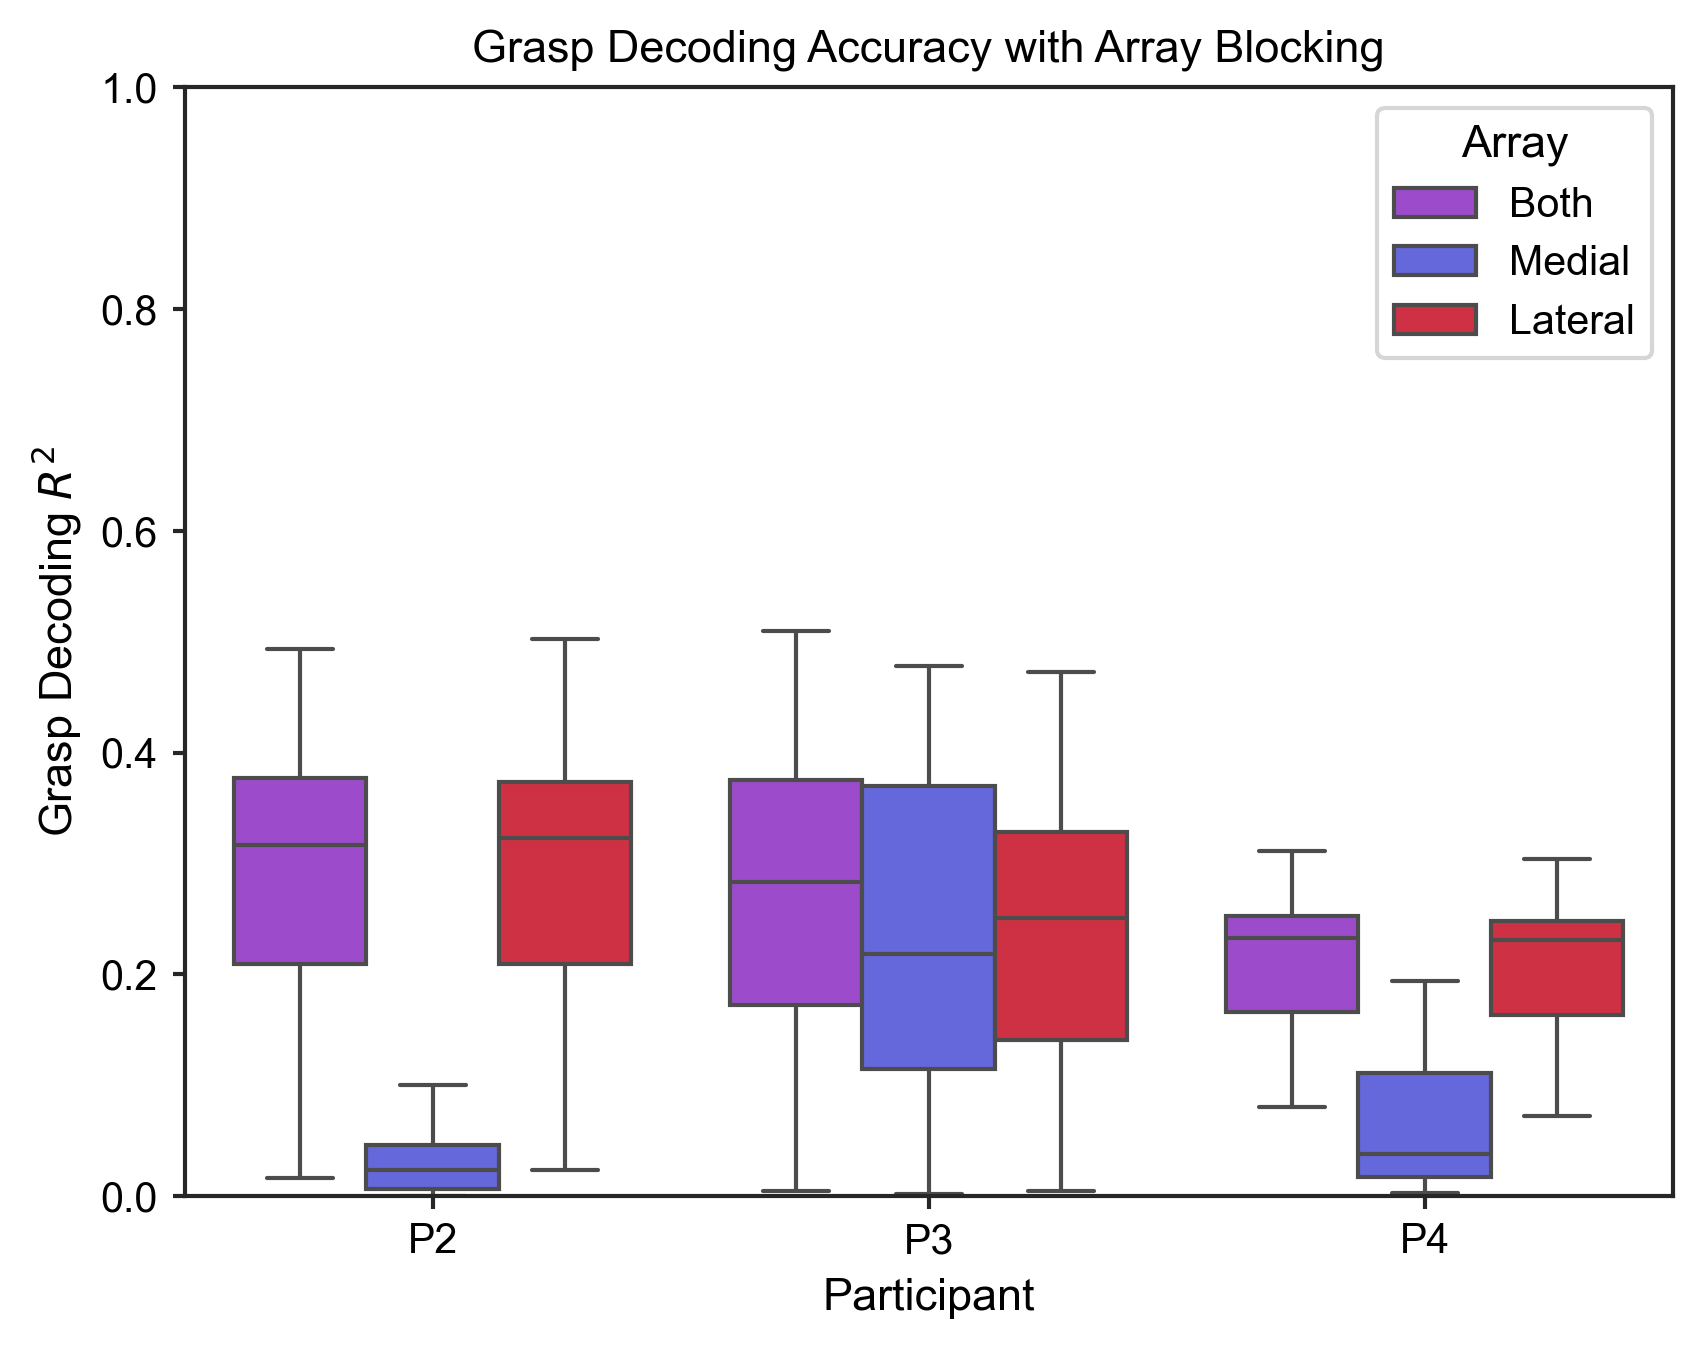

In [22]:
# Combine the accs and blocking data into one dataframe with all 3 participants
df_Arm_Grasp = pd.DataFrame({'Accuracy': np.concatenate([accs_2, accs_3, accs_4]), 'Participant': ['P2']*len(accs_2) + ['P3']*len(accs_3) + ['P4']*len(accs_4), 'Array': ['Both']*len(accs_2) + ['Both']*len(accs_3) + ['Both']*len(accs_4)})

# Add blocking data
df_Arm_Grasp = pd.concat((df_Arm_Grasp, pd.DataFrame({'Accuracy': np.concatenate([accs_2_block_lat, accs_2_block_med, accs_3_block_lat, accs_3_block_med, accs_4_block_lat, accs_4_block_med]), 'Participant': ['P2']*len(accs_2_block_lat) + ['P2']*len(accs_2_block_med) + ['P3']*len(accs_3_block_lat) + ['P3']*len(accs_3_block_med) + ['P4']*len(accs_4_block_lat) + ['P4']*len(accs_4_block_med), 'Array': ['Medial']*len(accs_2_block_lat) + ['Lateral']*len(accs_2_block_med) + ['Medial']*len(accs_3_block_lat) + ['Lateral']*len(accs_3_block_med) + ['Medial']*len(accs_4_block_lat) + ['Lateral']*len(accs_4_block_med)})), ignore_index=True)

# Plot in a grouped boxplot
sns.boxplot(data=df_Arm_Grasp, x='Participant', y='Accuracy', hue='Array', palette=array_colors)
plt.title('Grasp Decoding Accuracy with Array Blocking')
plt.ylabel('Grasp Decoding $R^2$')
plt.ylim([0, 1])

SF_NK("Grasp_Blocking_RIOLEd")

In [23]:
changes_and_stats(df_Arm_Grasp)

Median percent change in decoding accuracies:
P2: Medial: -92.54%, Lateral: 1.97%
P3: Medial: -22.78%, Lateral: -11.48%
P4: Medial: -83.48%, Lateral: -0.80%

Friedman test: 
P2:  FriedmanchisquareResult(statistic=63.19047619047615, pvalue=1.89828947939278e-14)
P3:  FriedmanchisquareResult(statistic=45.6444444444445, pvalue=1.2258429229336744e-10)
P4:  FriedmanchisquareResult(statistic=44.086956521739125, pvalue=2.670785620636643e-10)

Wilcoxon signed-rank tests: 
P2: 
Medial vs. Both:  WilcoxonResult(statistic=0.0, pvalue=4.547473508864641e-13)
Lateral vs. Both:  WilcoxonResult(statistic=405.0, pvalue=0.5688811644267844)
Medial vs. Lateral:  WilcoxonResult(statistic=0.0, pvalue=4.547473508864641e-13)
P3: 
Medial vs. Both:  WilcoxonResult(statistic=52.0, pvalue=2.2862423065816984e-09)
Lateral vs. Both:  WilcoxonResult(statistic=4.0, pvalue=3.979039320256561e-13)
Medial vs. Lateral:  WilcoxonResult(statistic=445.0, pvalue=0.42003832898581095)
P4: 
Medial vs. Both:  WilcoxonResult(statist

# Figure 5 - Cursor Decoding

## B - Translation Decoding

In [50]:
all_cursor = loadmat(f".//Data//...") # COMPLETE

In [51]:
accs_2 = all_cursor['R2_2'][0]
accs_2_block_lat = all_cursor['R2_2_block_lat'][0]
accs_2_block_med = all_cursor['R2_2_block_med'][0]

inval_sess_2 = np.isnan(accs_2) + np.isnan(accs_2_block_lat) + np.isnan(accs_2_block_med)

accs_3 = all_cursor['R2_3'][0]
accs_3_block_lat = all_cursor['R2_3_block_lat'][0]
accs_3_block_med = all_cursor['R2_3_block_med'][0]

inval_sess_3 = np.isnan(accs_3) + np.isnan(accs_3_block_lat) + np.isnan(accs_3_block_med)

accs_4 = all_cursor['R2_4'][0]
accs_4_block_lat = all_cursor['R2_4_block_lat'][0]
accs_4_block_med = all_cursor['R2_4_block_med'][0]

inval_sess_4 = np.isnan(accs_4) + np.isnan(accs_4_block_lat) + np.isnan(accs_4_block_med)

In [54]:
print(len(accs_2), len(accs_3), len(accs_4))

45 24 29


In [55]:
# Remove invalid sessions

accs_2 = accs_2[~inval_sess_2]
accs_2_block_lat = accs_2_block_lat[~inval_sess_2]
accs_2_block_med = accs_2_block_med[~inval_sess_2]

accs_3 = accs_3[~inval_sess_3]
accs_3_block_lat = accs_3_block_lat[~inval_sess_3]
accs_3_block_med = accs_3_block_med[~inval_sess_3]

accs_4 = accs_4[~inval_sess_4]
accs_4_block_lat = accs_4_block_lat[~inval_sess_4]
accs_4_block_med = accs_4_block_med[~inval_sess_4]

In [56]:
print(len(accs_2), len(accs_3), len(accs_4))

44 23 29


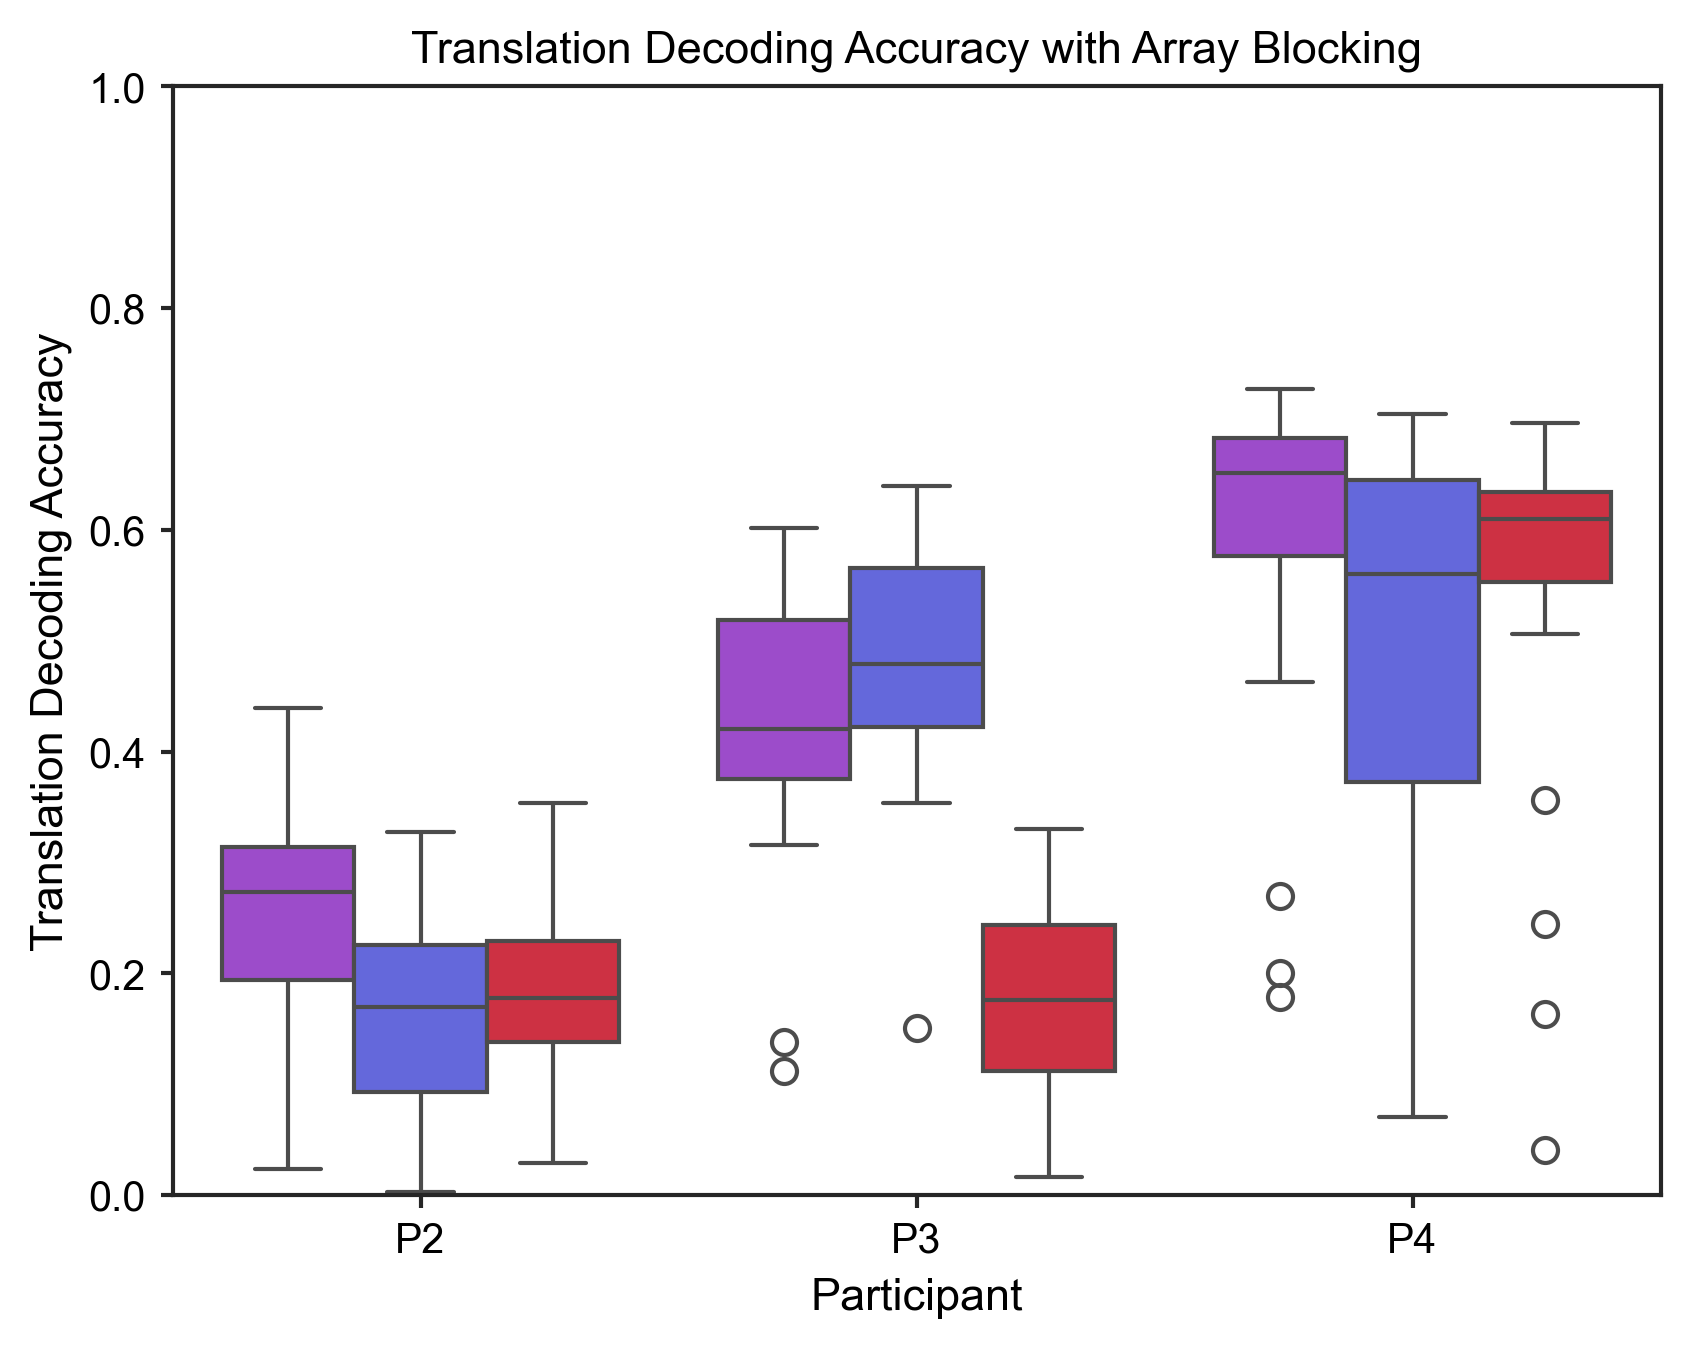

In [27]:
# Combine the accs and blocking data into one dataframe with all 3 participants
df_Cursor_Translation = pd.DataFrame({'Accuracy': np.concatenate([accs_2, accs_3, accs_4]), 'Participant': ['P2']*len(accs_2) + ['P3']*len(accs_3) + ['P4']*len(accs_4), 'Array': ['Both']*len(accs_2) + ['Both']*len(accs_3) + ['Both']*len(accs_4)})

# Add blocking data
df_Cursor_Translation = pd.concat((df_Cursor_Translation, pd.DataFrame({'Accuracy': np.concatenate([accs_2_block_lat, accs_2_block_med, accs_3_block_lat, accs_3_block_med, accs_4_block_lat, accs_4_block_med]), 'Participant': ['P2']*len(accs_2_block_lat) + ['P2']*len(accs_2_block_med) + ['P3']*len(accs_3_block_lat) + ['P3']*len(accs_3_block_med) + ['P4']*len(accs_4_block_lat) + ['P4']*len(accs_4_block_med), 'Array': ['Medial']*len(accs_2_block_lat) + ['Lateral']*len(accs_2_block_med) + ['Medial']*len(accs_3_block_lat) + ['Lateral']*len(accs_3_block_med) + ['Medial']*len(accs_4_block_lat) + ['Lateral']*len(accs_4_block_med)})), ignore_index=True)

# Plot in a grouped boxplot
sns.boxplot(data=df_Cursor_Translation, x='Participant', y='Accuracy', hue='Array', palette=array_colors)
plt.title('Translation Decoding Accuracy with Array Blocking')
plt.ylabel('Translation Decoding Accuracy')
plt.ylim([0, 1])

# Remove legend
plt.legend([],[], frameon=False)

SF_NK("Translation_Blocking_Cursor_RIOLEd")

In [28]:
changes_and_stats(df_Cursor_Translation)

Median percent change in decoding accuracies:
P2: Medial: -38.12%, Lateral: -34.88%
P3: Medial: 13.90%, Lateral: -58.22%
P4: Medial: -13.97%, Lateral: -6.44%

Friedman test: 
P2:  FriedmanchisquareResult(statistic=40.54545454545462, pvalue=1.5691570498040766e-09)
P3:  FriedmanchisquareResult(statistic=40.782608695652186, pvalue=1.3936991748977774e-09)
P4:  FriedmanchisquareResult(statistic=29.448275862068954, pvalue=4.0307711899588867e-07)

Wilcoxon signed-rank tests: 
P2: 
Medial vs. Both:  WilcoxonResult(statistic=35.0, pvalue=4.899902705801651e-10)
Lateral vs. Both:  WilcoxonResult(statistic=125.0, pvalue=3.8579728425247595e-06)
Medial vs. Lateral:  WilcoxonResult(statistic=415.0, pvalue=0.3570586959214097)
P3: 
Medial vs. Both:  WilcoxonResult(statistic=9.0, pvalue=7.867813110351562e-06)
Lateral vs. Both:  WilcoxonResult(statistic=0.0, pvalue=2.384185791015625e-07)
Medial vs. Lateral:  WilcoxonResult(statistic=0.0, pvalue=2.384185791015625e-07)
P4: 
Medial vs. Both:  WilcoxonResult

## C - Click Decoding

In [29]:
# P2
click_2 = loadmat(f".//Data//...") # COMPLETE

In [30]:
accs_2 = click_2['accs'][0]
accs_2_block_lat = click_2['accs_2_block_lat'][0]
accs_2_block_med = click_2['accs_2_block_med'][0]

inval_sess = np.isnan(accs_2) + np.isnan(accs_2_block_lat) + np.isnan(accs_2_block_med)

accs_2 = accs_2[~inval_sess]
accs_2_block_lat = accs_2_block_lat[~inval_sess]
accs_2_block_med = accs_2_block_med[~inval_sess]

In [31]:
# P3
click_3 = loadmat(f".//Data//...") # COMPLETE

In [32]:
accs_3 = click_3['accs_3'][0]
accs_3_block_lat = click_3['accs_3_block_lat'][0]
accs_3_block_med = click_3['accs_3_block_med'][0]

inval_sess = np.isnan(accs_3) + np.isnan(accs_3_block_lat) + np.isnan(accs_3_block_med)

accs_3 = accs_3[~inval_sess]
accs_3_block_lat = accs_3_block_lat[~inval_sess]
accs_3_block_med = accs_3_block_med[~inval_sess]

In [33]:
# P4
click_4 = loadmat(f".//Data//...") # COMPLETE

In [34]:
accs_4 = click_4['accs_4'][0]
accs_4_block_lat = click_4['accs_4_block_lat'][0][:-2]
accs_4_block_med = click_4['accs_4_block_med'][0][:-2]

inval_sess = np.isnan(accs_4) + np.isnan(accs_4_block_lat) + np.isnan(accs_4_block_med)

accs_4 = accs_4[~inval_sess]
accs_4_block_lat = accs_4_block_lat[~inval_sess]
accs_4_block_med = accs_4_block_med[~inval_sess]

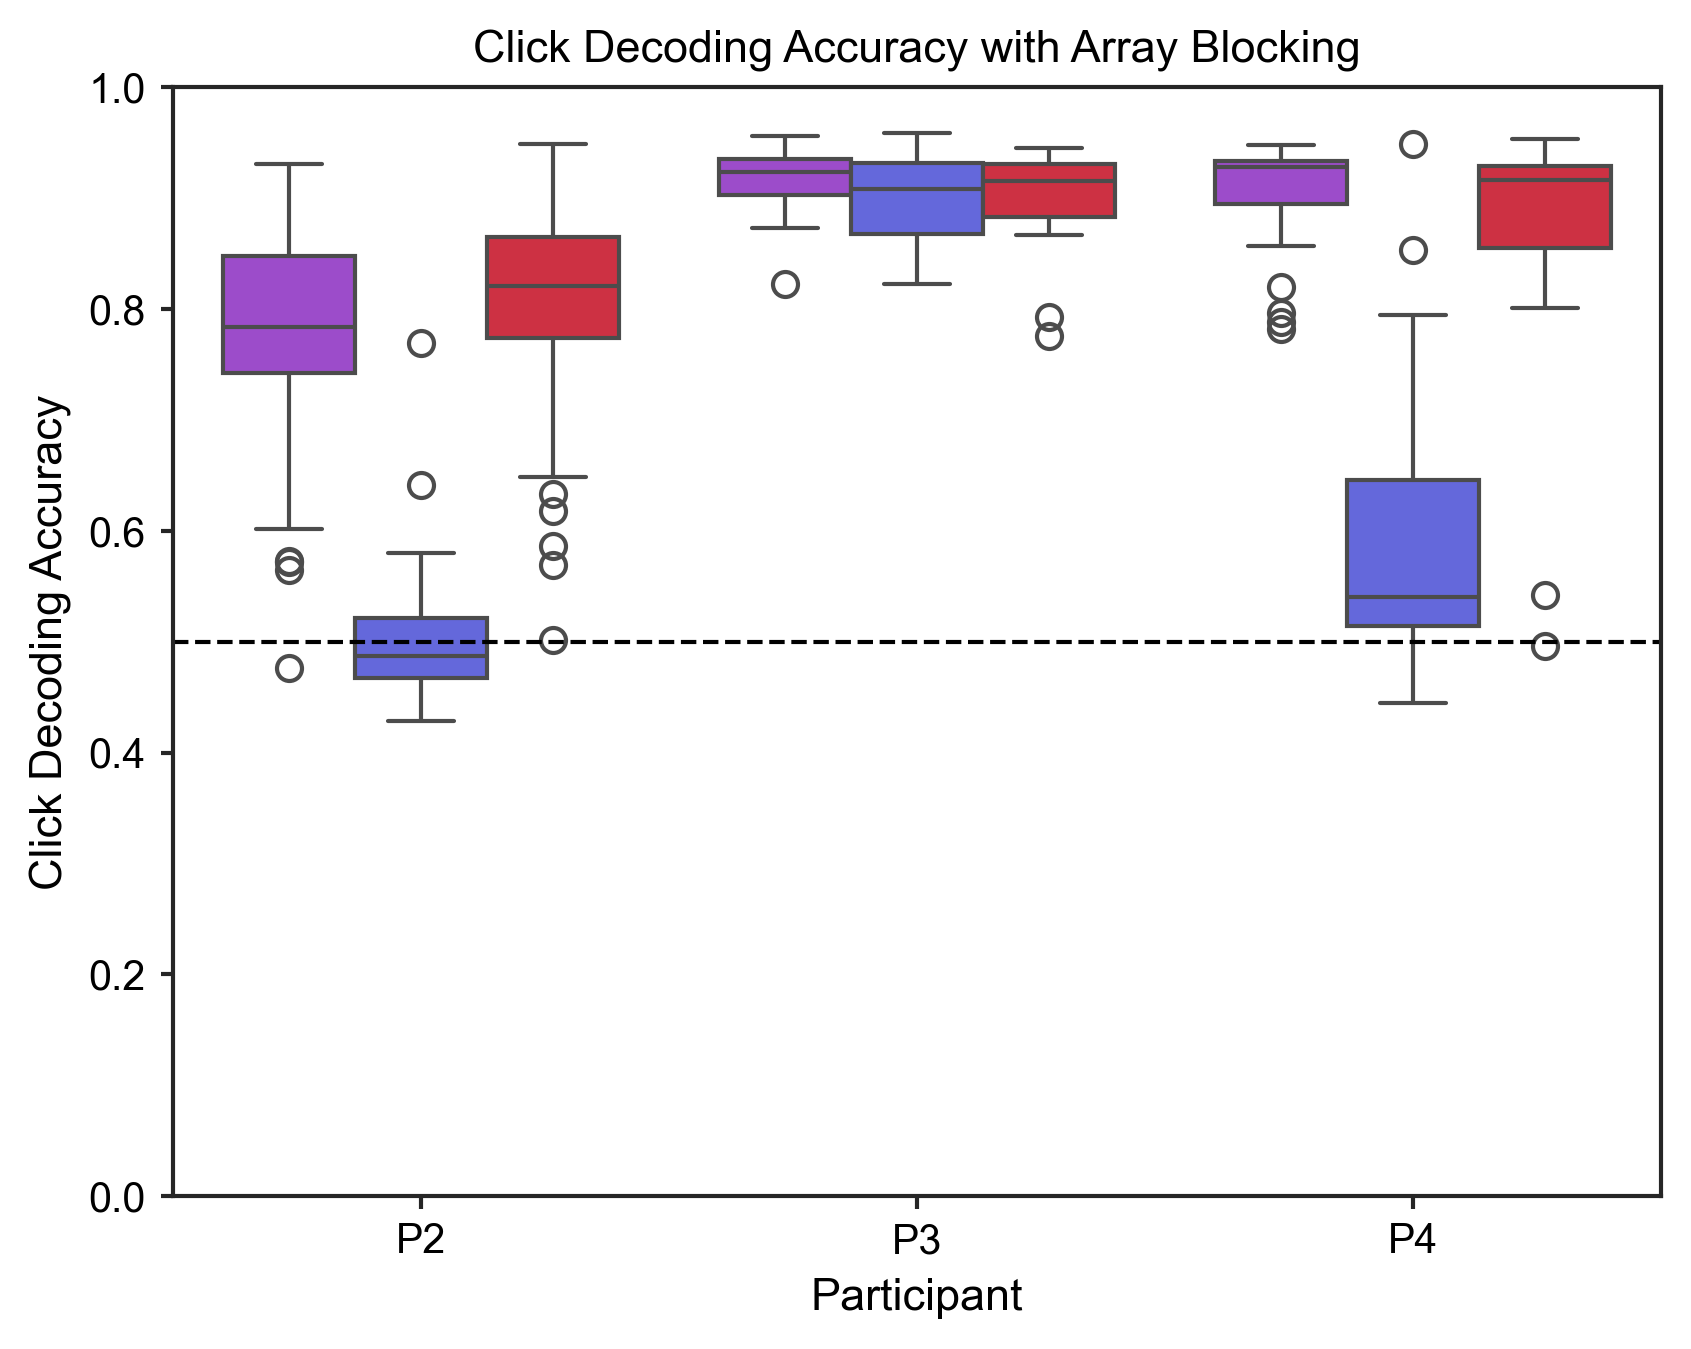

In [35]:
# Combine the accs and blocking data into one dataframe with all 3 participants
df_Cursor_Click = pd.DataFrame({'Accuracy': np.concatenate([accs_2, accs_3, accs_4]), 'Participant': ['P2']*len(accs_2) + ['P3']*len(accs_3) + ['P4']*len(accs_4), 'Array': ['Both']*len(accs_2) + ['Both']*len(accs_3) + ['Both']*len(accs_4)})

# Add blocking data
df_Cursor_Click = pd.concat((df_Cursor_Click, pd.DataFrame({'Accuracy': np.concatenate([accs_2_block_lat, accs_2_block_med, accs_3_block_lat, accs_3_block_med, accs_4_block_lat, accs_4_block_med]), 'Participant': ['P2']*len(accs_2_block_lat) + ['P2']*len(accs_2_block_med) + ['P3']*len(accs_3_block_lat) + ['P3']*len(accs_3_block_med) + ['P4']*len(accs_4_block_lat) + ['P4']*len(accs_4_block_med), 'Array': ['Medial']*len(accs_2_block_lat) + ['Lateral']*len(accs_2_block_med) + ['Medial']*len(accs_3_block_lat) + ['Lateral']*len(accs_3_block_med) + ['Medial']*len(accs_4_block_lat) + ['Lateral']*len(accs_4_block_med)})), ignore_index=True)

# Plot in a grouped boxplot
sns.boxplot(data=df_Cursor_Click, x='Participant', y='Accuracy', hue='Array', palette=array_colors)
plt.axhline(0.5, color='black', linestyle='--')
plt.title('Click Decoding Accuracy with Array Blocking')
plt.ylabel('Click Decoding Accuracy')
plt.ylim([0, 1])

# Remove legend
plt.legend([],[], frameon=False)

SF_NK("Click_Blocking_Orochi")

In [36]:
changes_and_stats(df_Cursor_Click)

Median percent change in decoding accuracies:
P2: Medial: -37.85%, Lateral: 4.62%
P3: Medial: -1.74%, Lateral: -0.90%
P4: Medial: -41.76%, Lateral: -1.24%

Friedman test: 
P2:  FriedmanchisquareResult(statistic=65.90697674418607, pvalue=4.8806969281691875e-15)
P3:  FriedmanchisquareResult(statistic=2.6197183098591355, pvalue=0.2698580618859134)
P4:  FriedmanchisquareResult(statistic=31.673469387755123, pvalue=1.324931761133654e-07)

Wilcoxon signed-rank tests: 
P2: 
Medial vs. Both:  WilcoxonResult(statistic=0.0, pvalue=2.2737367544323206e-13)
Lateral vs. Both:  WilcoxonResult(statistic=265.0, pvalue=0.011197180198450951)
Medial vs. Lateral:  WilcoxonResult(statistic=0.0, pvalue=2.2737367544323206e-13)
P3: 
Medial vs. Both:  WilcoxonResult(statistic=17.0, pvalue=0.004853230851379527)
Lateral vs. Both:  WilcoxonResult(statistic=40.0, pvalue=0.04827880859375)
Medial vs. Lateral:  WilcoxonResult(statistic=75.0, pvalue=0.6705245971679688)
P4: 
Medial vs. Both:  WilcoxonResult(statistic=1.0

## D - Wrist Imagery Decoding

In [57]:
# All
wrist_all = loadmat(f".//Data//...") # COMPLETE

In [58]:
accs_2 = wrist_all['R2_2'][0]
accs_2_block_lat = wrist_all['R2_2_block_lat'][0]
accs_2_block_med = wrist_all['R2_2_block_med'][0]

inval_sess = np.isnan(accs_2) + np.isnan(accs_2_block_lat) + np.isnan(accs_2_block_med)

accs_2 = accs_2[~inval_sess]
accs_2_block_lat = accs_2_block_lat[~inval_sess]
accs_2_block_med = accs_2_block_med[~inval_sess]

In [59]:
accs_3 = wrist_all['R2_3'][0]
accs_3_block_lat = wrist_all['R2_3_block_lat'][0]
accs_3_block_med = wrist_all['R2_3_block_med'][0]

inval_sess = np.isnan(accs_3) + np.isnan(accs_3_block_lat) + np.isnan(accs_3_block_med)

accs_3 = accs_3[~inval_sess]
accs_3_block_lat = accs_3_block_lat[~inval_sess]
accs_3_block_med = accs_3_block_med[~inval_sess]

In [60]:
accs_4 = wrist_all['R2_4'][0]
accs_4_block_lat = wrist_all['R2_4_block_lat'][0]
accs_4_block_med = wrist_all['R2_4_block_med'][0]

inval_sess = np.isnan(accs_4) + np.isnan(accs_4_block_lat) + np.isnan(accs_4_block_med)

accs_4 = accs_4[~inval_sess]
accs_4_block_lat = accs_4_block_lat[~inval_sess]
accs_4_block_med = accs_4_block_med[~inval_sess]

In [61]:
print(len(accs_2), len(accs_3), len(accs_4))

6 6 7


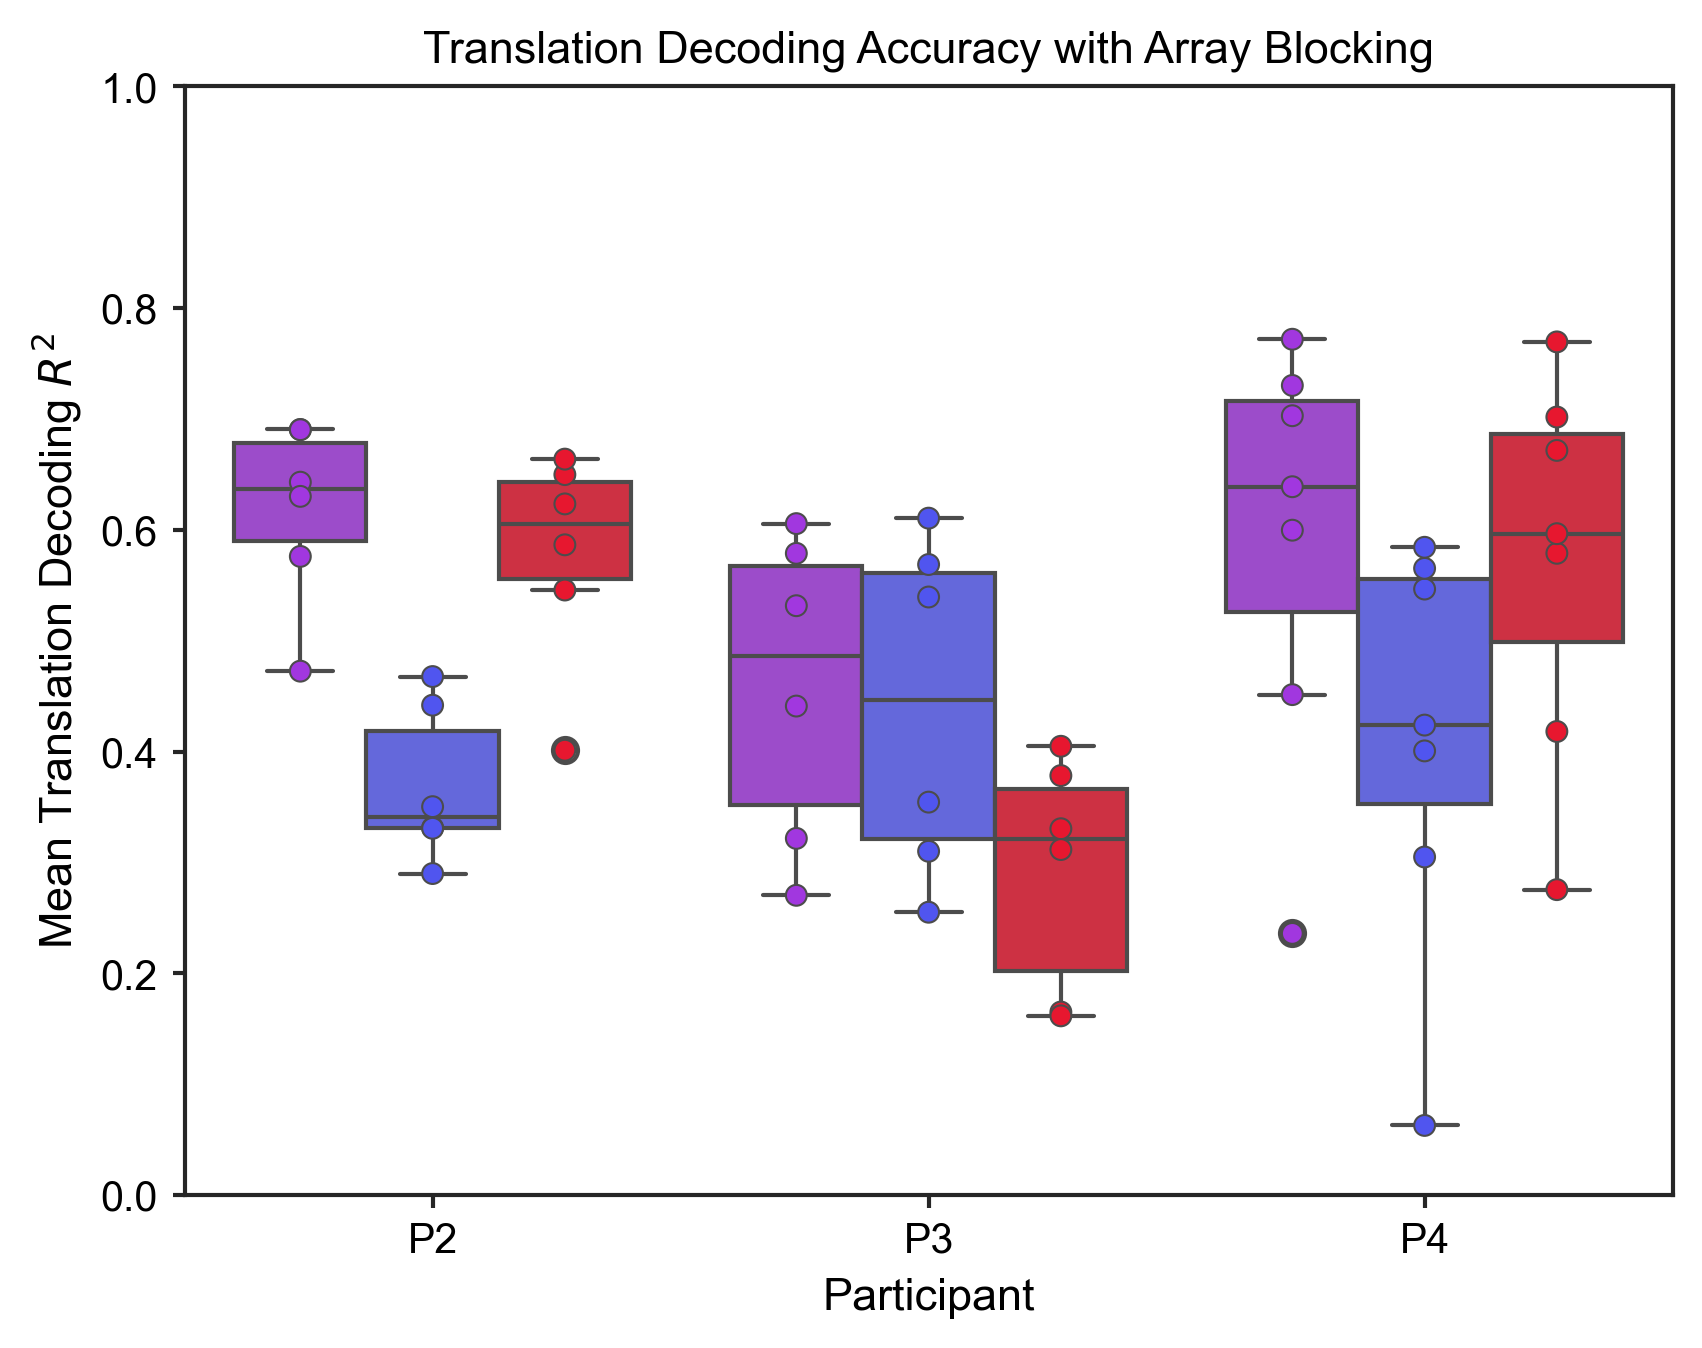

In [41]:
# Combine the accs and blocking data into one dataframe with all 3 participants
df_Cursor_Wrist = pd.DataFrame({'Accuracy': np.concatenate([accs_2, accs_3, accs_4]), 'Participant': ['P2']*len(accs_2) + ['P3']*len(accs_3) + ['P4']*len(accs_4), 'Array': ['Both']*len(accs_2) + ['Both']*len(accs_3) + ['Both']*len(accs_4)})

# Add blocking data
df_Cursor_Wrist = pd.concat((df_Cursor_Wrist, pd.DataFrame({'Accuracy': np.concatenate([accs_2_block_lat, accs_2_block_med, accs_3_block_lat, accs_3_block_med, accs_4_block_lat, accs_4_block_med]), 'Participant': ['P2']*len(accs_2_block_lat) + ['P2']*len(accs_2_block_med) + ['P3']*len(accs_3_block_lat) + ['P3']*len(accs_3_block_med) + ['P4']*len(accs_4_block_lat) + ['P4']*len(accs_4_block_med), 'Array': ['Medial']*len(accs_2_block_lat) + ['Lateral']*len(accs_2_block_med) + ['Medial']*len(accs_3_block_lat) + ['Lateral']*len(accs_3_block_med) + ['Medial']*len(accs_4_block_lat) + ['Lateral']*len(accs_4_block_med)})), ignore_index=True)

# Plot in a grouped boxplot

p = sns.stripplot(data=df_Cursor_Wrist, x='Participant', y='Accuracy', hue='Array', jitter=0, dodge=True, palette=array_colors, linewidth=0.5)

# Connect points for a given session with a line

# plot the mean line
sns.boxplot(data=df_Cursor_Wrist, x='Participant', y='Accuracy', hue='Array', palette=array_colors)

plt.title('Translation Decoding Accuracy with Array Blocking')
plt.ylabel('Mean Translation Decoding $R^2$')
plt.ylim([0, 1])

# Remove legend
plt.legend([],[], frameon=False)

SF_NK("Wrist_Cursor_RIOLEd")

In [42]:
changes_and_stats(df_Cursor_Wrist)

Median percent change in decoding accuracies:
P2: Medial: -46.45%, Lateral: -4.97%
P3: Medial: -8.10%, Lateral: -33.98%
P4: Medial: -33.64%, Lateral: -6.63%

Friedman test: 
P2:  FriedmanchisquareResult(statistic=12.0, pvalue=0.002478752176666357)
P3:  FriedmanchisquareResult(statistic=9.333333333333329, pvalue=0.00940356255149523)
P4:  FriedmanchisquareResult(statistic=12.285714285714278, pvalue=0.002148775480909733)

Wilcoxon signed-rank tests: 
P2: 
Medial vs. Both:  WilcoxonResult(statistic=0.0, pvalue=0.03125)
Lateral vs. Both:  WilcoxonResult(statistic=0.0, pvalue=0.03125)
Medial vs. Lateral:  WilcoxonResult(statistic=0.0, pvalue=0.03125)
P3: 
Medial vs. Both:  WilcoxonResult(statistic=3.0, pvalue=0.15625)
Lateral vs. Both:  WilcoxonResult(statistic=0.0, pvalue=0.03125)
Medial vs. Lateral:  WilcoxonResult(statistic=0.0, pvalue=0.03125)
P4: 
Medial vs. Both:  WilcoxonResult(statistic=0.0, pvalue=0.015625)
Lateral vs. Both:  WilcoxonResult(statistic=6.0, pvalue=0.21875)
Medial vs. 